# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

In [1]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.neural_net import TwoLayerNet

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

We will use the class `TwoLayerNet` in the file `cs231n/classifiers/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [2]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Forward pass: compute scores
Open the file `cs231n/classifiers/neural_net.py` and look at the method `TwoLayerNet.loss`. This function is very similar to the loss functions you have written for the SVM and Softmax exercises: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

In [3]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.6802720745909845e-08


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularization loss.

In [4]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
0.01896541960606335


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [5]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W1 max relative error: 3.561318e-09
W2 max relative error: 3.440708e-09
b1 max relative error: 2.738421e-09
b2 max relative error: 4.447625e-11


# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the SVM and Softmax classifiers. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.02.

Final training loss:  0.017143643532923764


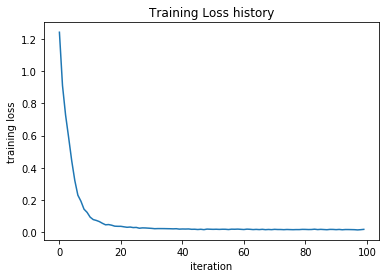

In [6]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [7]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    
    # Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
    try:
       del X_train, y_train
       del X_test, y_test
       print('Clear previously loaded data.')
    except:
       pass

    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


# Train a network
To train our network we will use SGD. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [8]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)


iteration 0 / 1000: loss 2.302762
iteration 100 / 1000: loss 2.302358
iteration 200 / 1000: loss 2.297404
iteration 300 / 1000: loss 2.258897
iteration 400 / 1000: loss 2.202975
iteration 500 / 1000: loss 2.116816
iteration 600 / 1000: loss 2.049789
iteration 700 / 1000: loss 1.985711
iteration 800 / 1000: loss 2.003726
iteration 900 / 1000: loss 1.948076
Validation accuracy:  0.287


# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

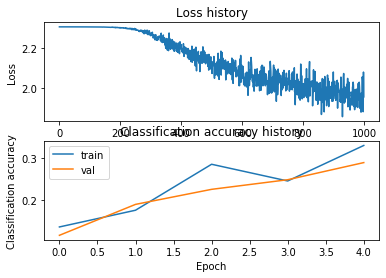

In [9]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()
plt.show()

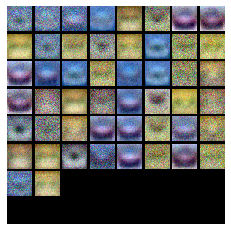

In [10]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can (52% could serve as a reference), with a fully-connected Neural Network. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

**Explain your hyperparameter tuning process below.**

$\color{blue}{\textit Your Answer:}$

lr = 0.001000 ,reg = 0.250000, hidden layer = 50

iteration 0 / 1000: loss 2.302780
iteration 100 / 1000: loss 1.934351
iteration 200 / 1000: loss 1.784995
iteration 300 / 1000: loss 1.707573
iteration 400 / 1000: loss 1.627130
iteration 500 / 1000: loss 1.616708
iteration 600 / 1000: loss 1.370703
iteration 700 / 1000: loss 1.510355
iteration 800 / 1000: loss 1.474063
iteration 900 / 1000: loss 1.348691
validation accuracy 0.458


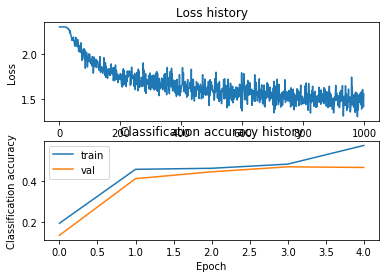

lr = 0.001000 ,reg = 0.250000, hidden layer = 60

iteration 0 / 1000: loss 2.302842
iteration 100 / 1000: loss 1.995600
iteration 200 / 1000: loss 1.732263
iteration 300 / 1000: loss 1.784487
iteration 400 / 1000: loss 1.514989
iteration 500 / 1000: loss 1.580809
iteration 600 / 1000: loss 1.589281
iteration 700 / 1000: loss 1.521446
iteration 800 / 1000: loss 1.669635
iteration 900 / 1000: loss 1.626992
validation accuracy 0.488


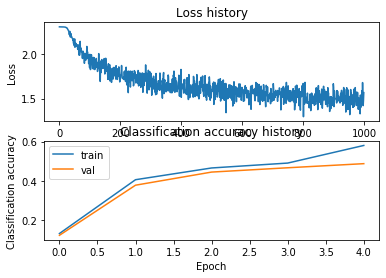

lr = 0.001000 ,reg = 0.250000, hidden layer = 70

iteration 0 / 1000: loss 2.302851
iteration 100 / 1000: loss 1.935868
iteration 200 / 1000: loss 1.737964
iteration 300 / 1000: loss 1.689896
iteration 400 / 1000: loss 1.650084
iteration 500 / 1000: loss 1.516739
iteration 600 / 1000: loss 1.528924
iteration 700 / 1000: loss 1.719146
iteration 800 / 1000: loss 1.616445
iteration 900 / 1000: loss 1.513469
validation accuracy 0.467


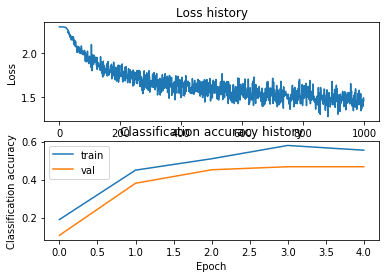

lr = 0.001000 ,reg = 0.250000, hidden layer = 80

iteration 0 / 1000: loss 2.302908
iteration 100 / 1000: loss 1.953723
iteration 200 / 1000: loss 1.746659
iteration 300 / 1000: loss 1.696940
iteration 400 / 1000: loss 1.591665
iteration 500 / 1000: loss 1.494846
iteration 600 / 1000: loss 1.511179
iteration 700 / 1000: loss 1.649194
iteration 800 / 1000: loss 1.404018
iteration 900 / 1000: loss 1.374971
validation accuracy 0.455


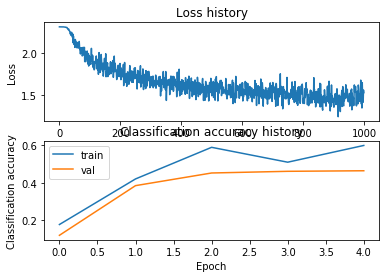

lr = 0.001000 ,reg = 0.250000, hidden layer = 90

iteration 0 / 1000: loss 2.302903
iteration 100 / 1000: loss 1.936231
iteration 200 / 1000: loss 1.803642
iteration 300 / 1000: loss 1.603967
iteration 400 / 1000: loss 1.603320
iteration 500 / 1000: loss 1.597424
iteration 600 / 1000: loss 1.478131
iteration 700 / 1000: loss 1.570322
iteration 800 / 1000: loss 1.531322
iteration 900 / 1000: loss 1.457799
validation accuracy 0.489


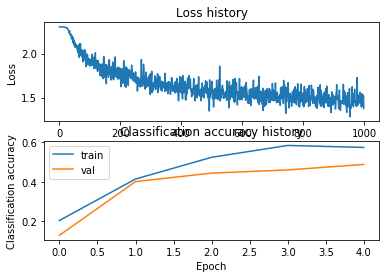

lr = 0.001000 ,reg = 0.250000, hidden layer = 100

iteration 0 / 1000: loss 2.302954
iteration 100 / 1000: loss 1.928894
iteration 200 / 1000: loss 1.727682
iteration 300 / 1000: loss 1.655133
iteration 400 / 1000: loss 1.540139
iteration 500 / 1000: loss 1.683642
iteration 600 / 1000: loss 1.541124
iteration 700 / 1000: loss 1.566826
iteration 800 / 1000: loss 1.469123
iteration 900 / 1000: loss 1.379364
validation accuracy 0.494


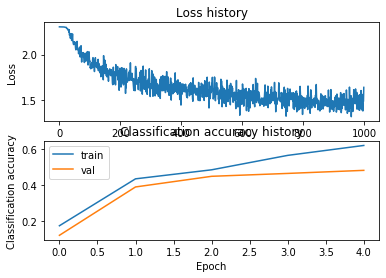

lr = 0.001000 ,reg = 0.250000, hidden layer = 200

iteration 0 / 1000: loss 2.303351
iteration 100 / 1000: loss 1.965560
iteration 200 / 1000: loss 1.747936
iteration 300 / 1000: loss 1.699845
iteration 400 / 1000: loss 1.624747
iteration 500 / 1000: loss 1.569525
iteration 600 / 1000: loss 1.525424
iteration 700 / 1000: loss 1.538489
iteration 800 / 1000: loss 1.372823
iteration 900 / 1000: loss 1.419289
validation accuracy 0.473


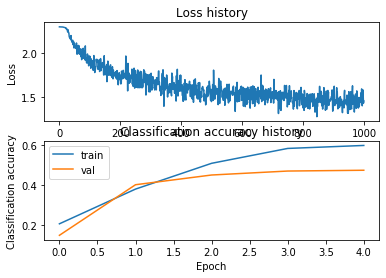

lr = 0.001000 ,reg = 0.250000, hidden layer = 500

iteration 0 / 1000: loss 2.304478
iteration 100 / 1000: loss 1.824912
iteration 200 / 1000: loss 1.711820
iteration 300 / 1000: loss 1.719115
iteration 400 / 1000: loss 1.626769
iteration 500 / 1000: loss 1.461125
iteration 600 / 1000: loss 1.605195
iteration 700 / 1000: loss 1.392148
iteration 800 / 1000: loss 1.523959
iteration 900 / 1000: loss 1.539528
validation accuracy 0.49


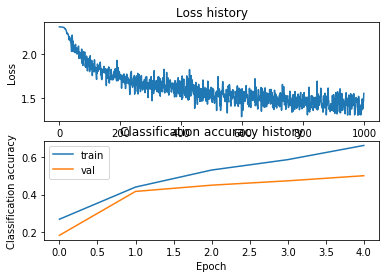

lr = 0.001000 ,reg = 0.500000, hidden layer = 50

iteration 0 / 1000: loss 2.302971
iteration 100 / 1000: loss 2.026190
iteration 200 / 1000: loss 1.824331
iteration 300 / 1000: loss 1.789027
iteration 400 / 1000: loss 1.664759
iteration 500 / 1000: loss 1.516264
iteration 600 / 1000: loss 1.580935
iteration 700 / 1000: loss 1.517282
iteration 800 / 1000: loss 1.651989
iteration 900 / 1000: loss 1.412772
validation accuracy 0.461


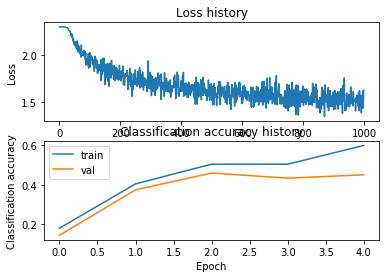

lr = 0.001000 ,reg = 0.500000, hidden layer = 60

iteration 0 / 1000: loss 2.303046
iteration 100 / 1000: loss 1.910167
iteration 200 / 1000: loss 1.803939
iteration 300 / 1000: loss 1.756240
iteration 400 / 1000: loss 1.763138
iteration 500 / 1000: loss 1.602015
iteration 600 / 1000: loss 1.546097
iteration 700 / 1000: loss 1.540955
iteration 800 / 1000: loss 1.533129
iteration 900 / 1000: loss 1.446866
validation accuracy 0.483


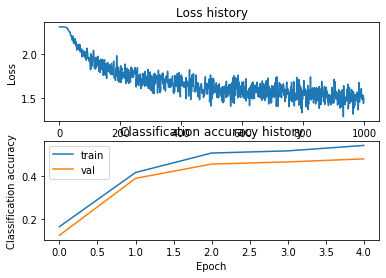

lr = 0.001000 ,reg = 0.500000, hidden layer = 70

iteration 0 / 1000: loss 2.303134
iteration 100 / 1000: loss 1.872364
iteration 200 / 1000: loss 1.849515
iteration 300 / 1000: loss 1.642033
iteration 400 / 1000: loss 1.612666
iteration 500 / 1000: loss 1.710233
iteration 600 / 1000: loss 1.683791
iteration 700 / 1000: loss 1.508878
iteration 800 / 1000: loss 1.498535
iteration 900 / 1000: loss 1.446306
validation accuracy 0.468


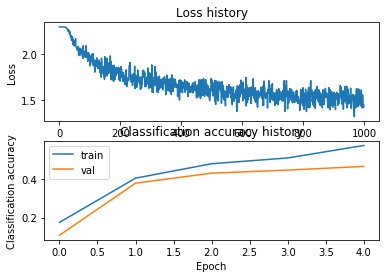

lr = 0.001000 ,reg = 0.500000, hidden layer = 80

iteration 0 / 1000: loss 2.303181
iteration 100 / 1000: loss 1.905730
iteration 200 / 1000: loss 1.761968
iteration 300 / 1000: loss 1.681344
iteration 400 / 1000: loss 1.713945
iteration 500 / 1000: loss 1.517508
iteration 600 / 1000: loss 1.477303
iteration 700 / 1000: loss 1.543297
iteration 800 / 1000: loss 1.542919
iteration 900 / 1000: loss 1.500363
validation accuracy 0.464


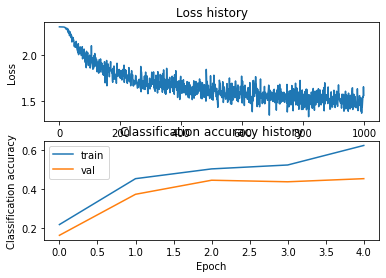

lr = 0.001000 ,reg = 0.500000, hidden layer = 90

iteration 0 / 1000: loss 2.303283
iteration 100 / 1000: loss 1.948260
iteration 200 / 1000: loss 1.967679
iteration 300 / 1000: loss 1.707885
iteration 400 / 1000: loss 1.706120
iteration 500 / 1000: loss 1.594830
iteration 600 / 1000: loss 1.668128
iteration 700 / 1000: loss 1.441923
iteration 800 / 1000: loss 1.653294
iteration 900 / 1000: loss 1.490099
validation accuracy 0.49


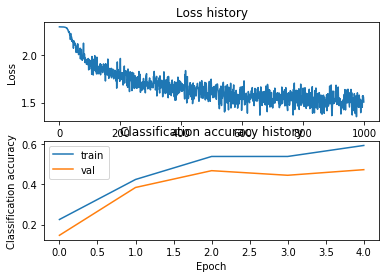

lr = 0.001000 ,reg = 0.500000, hidden layer = 100

iteration 0 / 1000: loss 2.303386
iteration 100 / 1000: loss 1.938593
iteration 200 / 1000: loss 1.725407
iteration 300 / 1000: loss 1.767737
iteration 400 / 1000: loss 1.662835
iteration 500 / 1000: loss 1.594434
iteration 600 / 1000: loss 1.575570
iteration 700 / 1000: loss 1.562402
iteration 800 / 1000: loss 1.412656
iteration 900 / 1000: loss 1.492755
validation accuracy 0.491


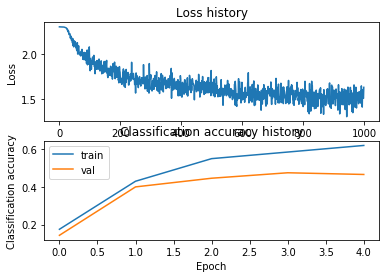

lr = 0.001000 ,reg = 0.500000, hidden layer = 200

iteration 0 / 1000: loss 2.304114
iteration 100 / 1000: loss 1.962221
iteration 200 / 1000: loss 1.912588
iteration 300 / 1000: loss 1.555964
iteration 400 / 1000: loss 1.534005
iteration 500 / 1000: loss 1.574628
iteration 600 / 1000: loss 1.591816
iteration 700 / 1000: loss 1.591068
iteration 800 / 1000: loss 1.473400
iteration 900 / 1000: loss 1.444774
validation accuracy 0.49


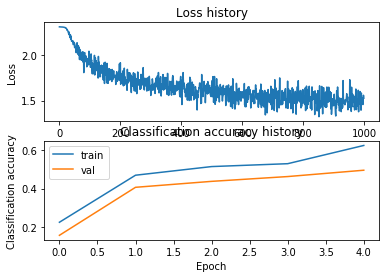

lr = 0.001000 ,reg = 0.500000, hidden layer = 500

iteration 0 / 1000: loss 2.306552
iteration 100 / 1000: loss 1.861505
iteration 200 / 1000: loss 1.762654
iteration 300 / 1000: loss 1.616948
iteration 400 / 1000: loss 1.734152
iteration 500 / 1000: loss 1.698721
iteration 600 / 1000: loss 1.589768
iteration 700 / 1000: loss 1.482507
iteration 800 / 1000: loss 1.533364
iteration 900 / 1000: loss 1.500310
validation accuracy 0.486


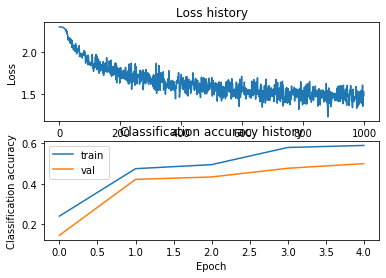

lr = 0.001000 ,reg = 0.750000, hidden layer = 50

iteration 0 / 1000: loss 2.303196
iteration 100 / 1000: loss 1.918185
iteration 200 / 1000: loss 1.805501
iteration 300 / 1000: loss 1.778646
iteration 400 / 1000: loss 1.607727
iteration 500 / 1000: loss 1.732873
iteration 600 / 1000: loss 1.659205
iteration 700 / 1000: loss 1.479741
iteration 800 / 1000: loss 1.588173
iteration 900 / 1000: loss 1.572930
validation accuracy 0.447


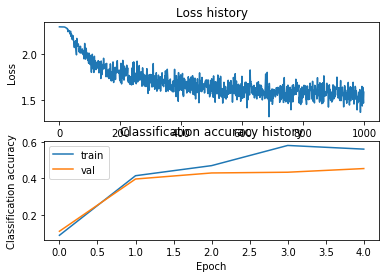

lr = 0.001000 ,reg = 0.750000, hidden layer = 60

iteration 0 / 1000: loss 2.303266
iteration 100 / 1000: loss 2.019595
iteration 200 / 1000: loss 1.917745
iteration 300 / 1000: loss 1.735803
iteration 400 / 1000: loss 1.739444
iteration 500 / 1000: loss 1.552506
iteration 600 / 1000: loss 1.694773
iteration 700 / 1000: loss 1.604154
iteration 800 / 1000: loss 1.612211
iteration 900 / 1000: loss 1.541657
validation accuracy 0.448


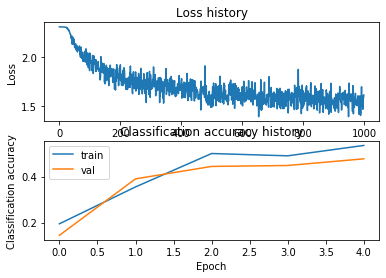

lr = 0.001000 ,reg = 0.750000, hidden layer = 70

iteration 0 / 1000: loss 2.303376
iteration 100 / 1000: loss 1.934311
iteration 200 / 1000: loss 1.842057
iteration 300 / 1000: loss 1.691565
iteration 400 / 1000: loss 1.694278
iteration 500 / 1000: loss 1.561133
iteration 600 / 1000: loss 1.594934
iteration 700 / 1000: loss 1.646533
iteration 800 / 1000: loss 1.647609
iteration 900 / 1000: loss 1.398479
validation accuracy 0.461


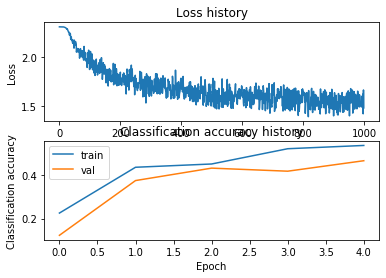

lr = 0.001000 ,reg = 0.750000, hidden layer = 80

iteration 0 / 1000: loss 2.303533
iteration 100 / 1000: loss 1.948555
iteration 200 / 1000: loss 1.839932
iteration 300 / 1000: loss 1.818704
iteration 400 / 1000: loss 1.659555
iteration 500 / 1000: loss 1.513261
iteration 600 / 1000: loss 1.677210
iteration 700 / 1000: loss 1.602914
iteration 800 / 1000: loss 1.566163
iteration 900 / 1000: loss 1.461701
validation accuracy 0.47


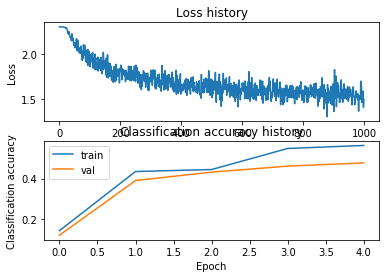

lr = 0.001000 ,reg = 0.750000, hidden layer = 90

iteration 0 / 1000: loss 2.303644
iteration 100 / 1000: loss 1.887302
iteration 200 / 1000: loss 1.854171
iteration 300 / 1000: loss 1.680739
iteration 400 / 1000: loss 1.677564
iteration 500 / 1000: loss 1.615064
iteration 600 / 1000: loss 1.735335
iteration 700 / 1000: loss 1.491962
iteration 800 / 1000: loss 1.644743
iteration 900 / 1000: loss 1.507658
validation accuracy 0.493


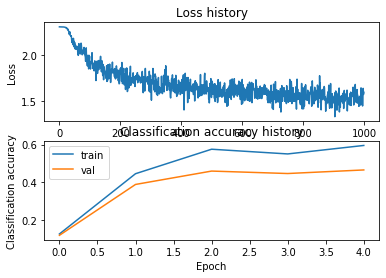

lr = 0.001000 ,reg = 0.750000, hidden layer = 100

iteration 0 / 1000: loss 2.303765
iteration 100 / 1000: loss 1.962991
iteration 200 / 1000: loss 1.709996
iteration 300 / 1000: loss 1.753640
iteration 400 / 1000: loss 1.630590
iteration 500 / 1000: loss 1.642760
iteration 600 / 1000: loss 1.722649
iteration 700 / 1000: loss 1.533459
iteration 800 / 1000: loss 1.581867
iteration 900 / 1000: loss 1.400746
validation accuracy 0.465


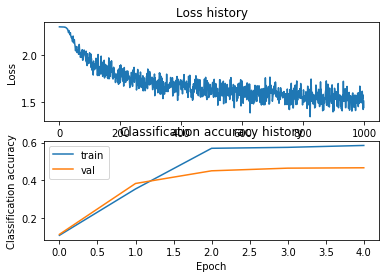

lr = 0.001000 ,reg = 0.750000, hidden layer = 200

iteration 0 / 1000: loss 2.304853
iteration 100 / 1000: loss 1.966643
iteration 200 / 1000: loss 1.763298
iteration 300 / 1000: loss 1.663257
iteration 400 / 1000: loss 1.594127
iteration 500 / 1000: loss 1.575324
iteration 600 / 1000: loss 1.573601
iteration 700 / 1000: loss 1.647054
iteration 800 / 1000: loss 1.636275
iteration 900 / 1000: loss 1.445355
validation accuracy 0.485


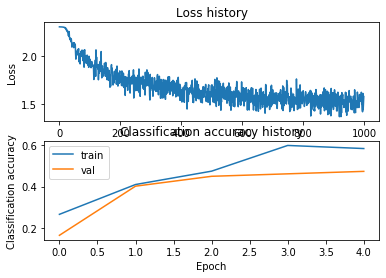

lr = 0.001000 ,reg = 0.750000, hidden layer = 500

iteration 0 / 1000: loss 2.308390
iteration 100 / 1000: loss 1.859459
iteration 200 / 1000: loss 1.695197
iteration 300 / 1000: loss 1.634067
iteration 400 / 1000: loss 1.727753
iteration 500 / 1000: loss 1.612503
iteration 600 / 1000: loss 1.484735
iteration 700 / 1000: loss 1.645849
iteration 800 / 1000: loss 1.613480
iteration 900 / 1000: loss 1.425072
validation accuracy 0.493


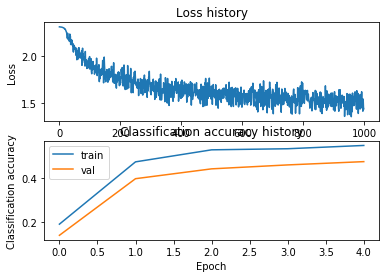

lr = 0.001000 ,reg = 1.000000, hidden layer = 50

iteration 0 / 1000: loss 2.303359
iteration 100 / 1000: loss 2.031165
iteration 200 / 1000: loss 1.952223
iteration 300 / 1000: loss 1.659183
iteration 400 / 1000: loss 1.625848
iteration 500 / 1000: loss 1.649536
iteration 600 / 1000: loss 1.542388
iteration 700 / 1000: loss 1.706412
iteration 800 / 1000: loss 1.662730
iteration 900 / 1000: loss 1.499258
validation accuracy 0.471


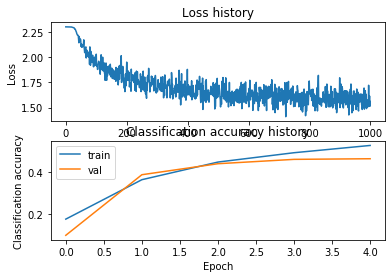

lr = 0.001000 ,reg = 1.000000, hidden layer = 60

iteration 0 / 1000: loss 2.303506
iteration 100 / 1000: loss 2.031988
iteration 200 / 1000: loss 1.697852
iteration 300 / 1000: loss 1.739219
iteration 400 / 1000: loss 1.733452
iteration 500 / 1000: loss 1.600370
iteration 600 / 1000: loss 1.671684
iteration 700 / 1000: loss 1.657901
iteration 800 / 1000: loss 1.575710
iteration 900 / 1000: loss 1.615586
validation accuracy 0.467


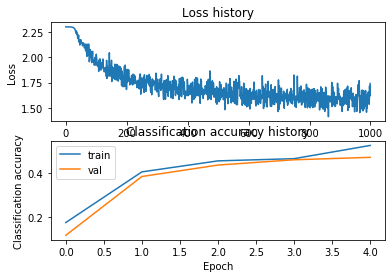

lr = 0.001000 ,reg = 1.000000, hidden layer = 70

iteration 0 / 1000: loss 2.303616
iteration 100 / 1000: loss 1.994187
iteration 200 / 1000: loss 1.839177
iteration 300 / 1000: loss 1.720604
iteration 400 / 1000: loss 1.622125
iteration 500 / 1000: loss 1.639316
iteration 600 / 1000: loss 1.561993
iteration 700 / 1000: loss 1.689609
iteration 800 / 1000: loss 1.617865
iteration 900 / 1000: loss 1.615920
validation accuracy 0.469


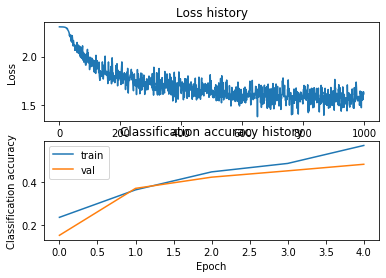

lr = 0.001000 ,reg = 1.000000, hidden layer = 80

iteration 0 / 1000: loss 2.303853
iteration 100 / 1000: loss 1.870086
iteration 200 / 1000: loss 1.834241
iteration 300 / 1000: loss 1.630712
iteration 400 / 1000: loss 1.716450
iteration 500 / 1000: loss 1.753109
iteration 600 / 1000: loss 1.546405
iteration 700 / 1000: loss 1.492113
iteration 800 / 1000: loss 1.681759
iteration 900 / 1000: loss 1.489972
validation accuracy 0.456


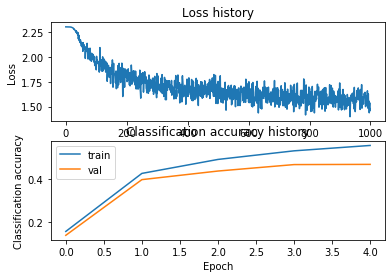

lr = 0.001000 ,reg = 1.000000, hidden layer = 90

iteration 0 / 1000: loss 2.303989
iteration 100 / 1000: loss 1.975380
iteration 200 / 1000: loss 1.744881
iteration 300 / 1000: loss 1.700739
iteration 400 / 1000: loss 1.660819
iteration 500 / 1000: loss 1.673815
iteration 600 / 1000: loss 1.648392
iteration 700 / 1000: loss 1.532121
iteration 800 / 1000: loss 1.540776
iteration 900 / 1000: loss 1.551286
validation accuracy 0.481


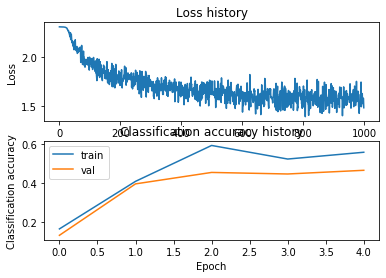

lr = 0.001000 ,reg = 1.000000, hidden layer = 100

iteration 0 / 1000: loss 2.304135
iteration 100 / 1000: loss 2.013052
iteration 200 / 1000: loss 1.877334
iteration 300 / 1000: loss 1.723554
iteration 400 / 1000: loss 1.659895
iteration 500 / 1000: loss 1.608831
iteration 600 / 1000: loss 1.620041
iteration 700 / 1000: loss 1.634126
iteration 800 / 1000: loss 1.585288
iteration 900 / 1000: loss 1.725758
validation accuracy 0.484


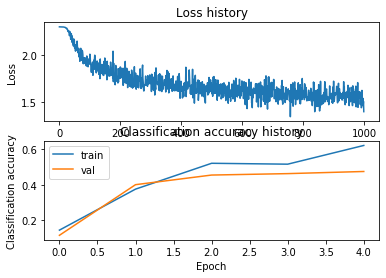

lr = 0.001000 ,reg = 1.000000, hidden layer = 200

iteration 0 / 1000: loss 2.305651
iteration 100 / 1000: loss 1.930083
iteration 200 / 1000: loss 1.813469
iteration 300 / 1000: loss 1.672705
iteration 400 / 1000: loss 1.696640
iteration 500 / 1000: loss 1.524691
iteration 600 / 1000: loss 1.667257
iteration 700 / 1000: loss 1.554227
iteration 800 / 1000: loss 1.615419
iteration 900 / 1000: loss 1.633562
validation accuracy 0.486


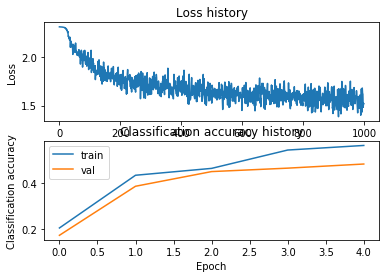

lr = 0.001000 ,reg = 1.000000, hidden layer = 500

iteration 0 / 1000: loss 2.310298
iteration 100 / 1000: loss 1.902159
iteration 200 / 1000: loss 1.656953
iteration 300 / 1000: loss 1.842642
iteration 400 / 1000: loss 1.484589
iteration 500 / 1000: loss 1.620838
iteration 600 / 1000: loss 1.575725
iteration 700 / 1000: loss 1.560334
iteration 800 / 1000: loss 1.646040
iteration 900 / 1000: loss 1.598789
validation accuracy 0.498


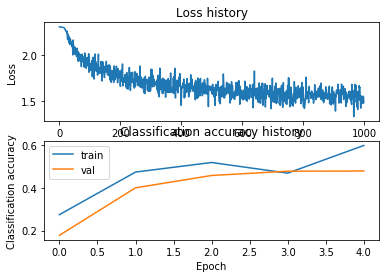

lr = 0.001000 ,reg = 1.250000, hidden layer = 50

iteration 0 / 1000: loss 2.303541
iteration 100 / 1000: loss 1.970558
iteration 200 / 1000: loss 1.760105
iteration 300 / 1000: loss 1.692676
iteration 400 / 1000: loss 1.572975
iteration 500 / 1000: loss 1.641559
iteration 600 / 1000: loss 1.627267
iteration 700 / 1000: loss 1.641147
iteration 800 / 1000: loss 1.565500
iteration 900 / 1000: loss 1.652701
validation accuracy 0.459


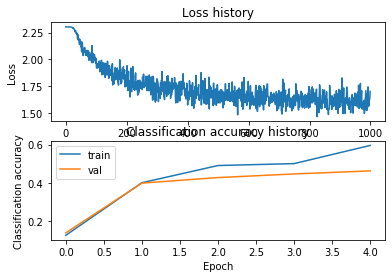

lr = 0.001000 ,reg = 1.250000, hidden layer = 60

iteration 0 / 1000: loss 2.303741
iteration 100 / 1000: loss 1.913785
iteration 200 / 1000: loss 1.839058
iteration 300 / 1000: loss 1.746306
iteration 400 / 1000: loss 1.621411
iteration 500 / 1000: loss 1.738797
iteration 600 / 1000: loss 1.692342
iteration 700 / 1000: loss 1.629223
iteration 800 / 1000: loss 1.638332
iteration 900 / 1000: loss 1.715401
validation accuracy 0.481


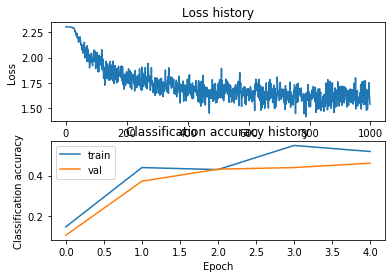

lr = 0.001000 ,reg = 1.250000, hidden layer = 70

iteration 0 / 1000: loss 2.303936
iteration 100 / 1000: loss 1.897524
iteration 200 / 1000: loss 1.797006
iteration 300 / 1000: loss 1.598226
iteration 400 / 1000: loss 1.590799
iteration 500 / 1000: loss 1.711246
iteration 600 / 1000: loss 1.692284
iteration 700 / 1000: loss 1.510811
iteration 800 / 1000: loss 1.650929
iteration 900 / 1000: loss 1.459036
validation accuracy 0.468


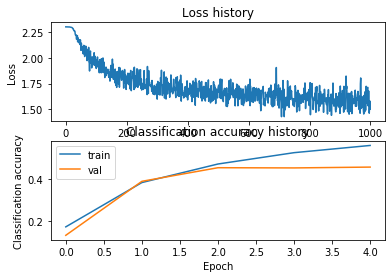

lr = 0.001000 ,reg = 1.250000, hidden layer = 80

iteration 0 / 1000: loss 2.304094
iteration 100 / 1000: loss 1.903552
iteration 200 / 1000: loss 1.819336
iteration 300 / 1000: loss 1.756729
iteration 400 / 1000: loss 1.653700
iteration 500 / 1000: loss 1.685580
iteration 600 / 1000: loss 1.600156
iteration 700 / 1000: loss 1.750820
iteration 800 / 1000: loss 1.647039
iteration 900 / 1000: loss 1.594624
validation accuracy 0.49


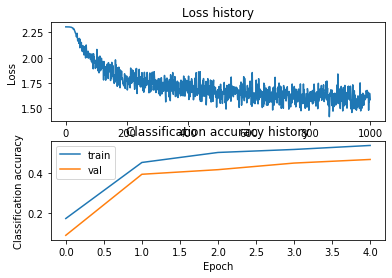

lr = 0.001000 ,reg = 1.250000, hidden layer = 90

iteration 0 / 1000: loss 2.304331
iteration 100 / 1000: loss 1.960989
iteration 200 / 1000: loss 1.734703
iteration 300 / 1000: loss 1.858116
iteration 400 / 1000: loss 1.628331
iteration 500 / 1000: loss 1.610758
iteration 600 / 1000: loss 1.553303
iteration 700 / 1000: loss 1.623623
iteration 800 / 1000: loss 1.621567
iteration 900 / 1000: loss 1.614473
validation accuracy 0.462


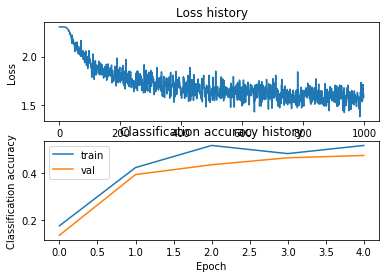

lr = 0.001000 ,reg = 1.250000, hidden layer = 100

iteration 0 / 1000: loss 2.304505
iteration 100 / 1000: loss 1.931342
iteration 200 / 1000: loss 1.891955
iteration 300 / 1000: loss 1.751548
iteration 400 / 1000: loss 1.799786
iteration 500 / 1000: loss 1.704168
iteration 600 / 1000: loss 1.654832
iteration 700 / 1000: loss 1.694077
iteration 800 / 1000: loss 1.525023
iteration 900 / 1000: loss 1.584662
validation accuracy 0.481


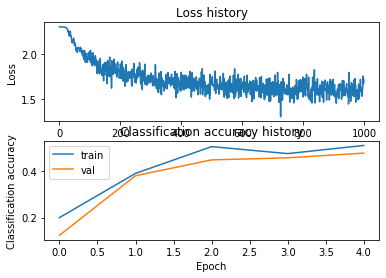

lr = 0.001000 ,reg = 1.250000, hidden layer = 200

iteration 0 / 1000: loss 2.306417
iteration 100 / 1000: loss 1.864645
iteration 200 / 1000: loss 1.783037
iteration 300 / 1000: loss 1.749275
iteration 400 / 1000: loss 1.784787
iteration 500 / 1000: loss 1.596741
iteration 600 / 1000: loss 1.668563
iteration 700 / 1000: loss 1.576427
iteration 800 / 1000: loss 1.488391
iteration 900 / 1000: loss 1.578149
validation accuracy 0.47


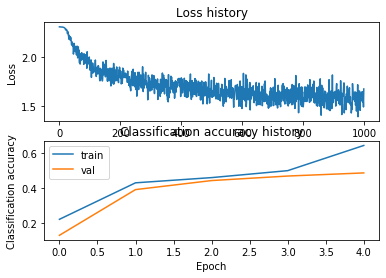

lr = 0.001000 ,reg = 1.250000, hidden layer = 500

iteration 0 / 1000: loss 2.312284
iteration 100 / 1000: loss 1.924854
iteration 200 / 1000: loss 1.691456
iteration 300 / 1000: loss 1.743876
iteration 400 / 1000: loss 1.671139
iteration 500 / 1000: loss 1.606991
iteration 600 / 1000: loss 1.645754
iteration 700 / 1000: loss 1.578006
iteration 800 / 1000: loss 1.654022
iteration 900 / 1000: loss 1.534845
validation accuracy 0.489


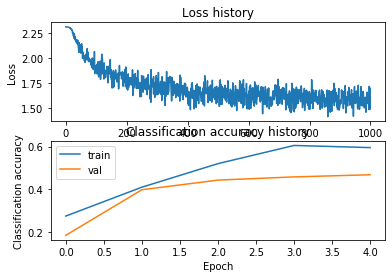

lr = 0.001000 ,reg = 1.500000, hidden layer = 50

iteration 0 / 1000: loss 2.303746
iteration 100 / 1000: loss 2.009056
iteration 200 / 1000: loss 1.767983
iteration 300 / 1000: loss 1.784488
iteration 400 / 1000: loss 1.678999
iteration 500 / 1000: loss 1.797731
iteration 600 / 1000: loss 1.756691
iteration 700 / 1000: loss 1.673980
iteration 800 / 1000: loss 1.661313
iteration 900 / 1000: loss 1.551116
validation accuracy 0.471


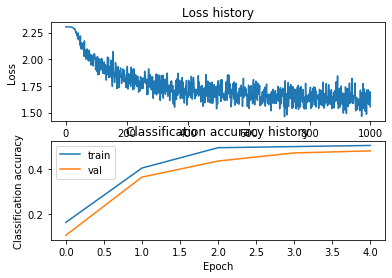

lr = 0.001000 ,reg = 1.500000, hidden layer = 60

iteration 0 / 1000: loss 2.303954
iteration 100 / 1000: loss 1.966430
iteration 200 / 1000: loss 1.815953
iteration 300 / 1000: loss 1.763275
iteration 400 / 1000: loss 1.750974
iteration 500 / 1000: loss 1.729733
iteration 600 / 1000: loss 1.840188
iteration 700 / 1000: loss 1.700742
iteration 800 / 1000: loss 1.638072
iteration 900 / 1000: loss 1.693152
validation accuracy 0.468


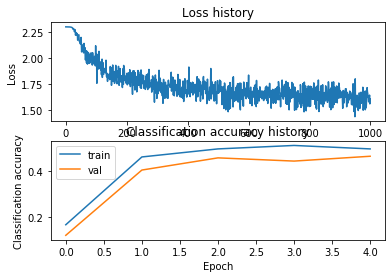

lr = 0.001000 ,reg = 1.500000, hidden layer = 70

iteration 0 / 1000: loss 2.304183
iteration 100 / 1000: loss 1.986822
iteration 200 / 1000: loss 1.794926
iteration 300 / 1000: loss 1.699850
iteration 400 / 1000: loss 1.668232
iteration 500 / 1000: loss 1.615139
iteration 600 / 1000: loss 1.668790
iteration 700 / 1000: loss 1.672637
iteration 800 / 1000: loss 1.558272
iteration 900 / 1000: loss 1.737003
validation accuracy 0.473


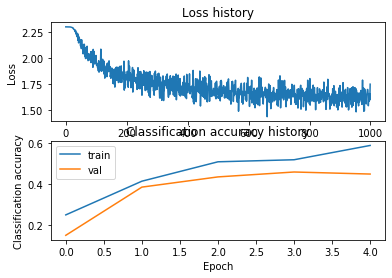

lr = 0.001000 ,reg = 1.500000, hidden layer = 80

iteration 0 / 1000: loss 2.304439
iteration 100 / 1000: loss 1.929660
iteration 200 / 1000: loss 1.712507
iteration 300 / 1000: loss 1.770722
iteration 400 / 1000: loss 1.787990
iteration 500 / 1000: loss 1.683256
iteration 600 / 1000: loss 1.625122
iteration 700 / 1000: loss 1.556278
iteration 800 / 1000: loss 1.588554
iteration 900 / 1000: loss 1.551442
validation accuracy 0.46


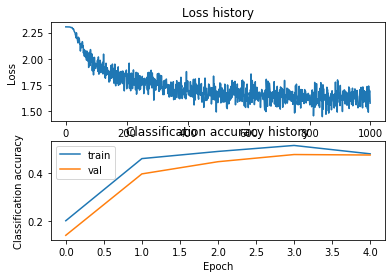

lr = 0.001000 ,reg = 1.500000, hidden layer = 90

iteration 0 / 1000: loss 2.304709
iteration 100 / 1000: loss 1.920001
iteration 200 / 1000: loss 1.895981
iteration 300 / 1000: loss 1.799365
iteration 400 / 1000: loss 1.704608
iteration 500 / 1000: loss 1.700597
iteration 600 / 1000: loss 1.584617
iteration 700 / 1000: loss 1.702427
iteration 800 / 1000: loss 1.686385
iteration 900 / 1000: loss 1.557143
validation accuracy 0.467


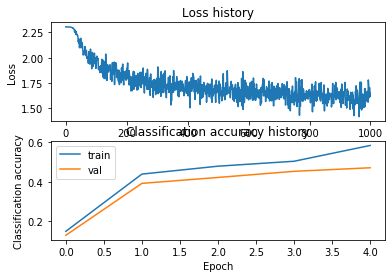

lr = 0.001000 ,reg = 1.500000, hidden layer = 100

iteration 0 / 1000: loss 2.304852
iteration 100 / 1000: loss 1.943477
iteration 200 / 1000: loss 1.748529
iteration 300 / 1000: loss 1.783784
iteration 400 / 1000: loss 1.782901
iteration 500 / 1000: loss 1.694823
iteration 600 / 1000: loss 1.775929
iteration 700 / 1000: loss 1.626894
iteration 800 / 1000: loss 1.667607
iteration 900 / 1000: loss 1.559091
validation accuracy 0.478


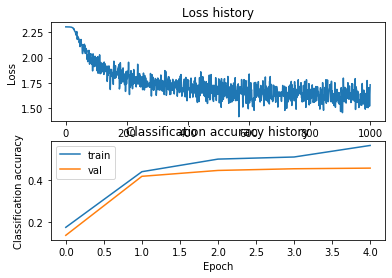

lr = 0.001000 ,reg = 1.500000, hidden layer = 200

iteration 0 / 1000: loss 2.307185
iteration 100 / 1000: loss 1.866621
iteration 200 / 1000: loss 1.797631
iteration 300 / 1000: loss 1.755099
iteration 400 / 1000: loss 1.700127
iteration 500 / 1000: loss 1.764754
iteration 600 / 1000: loss 1.674271
iteration 700 / 1000: loss 1.693843
iteration 800 / 1000: loss 1.606051
iteration 900 / 1000: loss 1.594875
validation accuracy 0.472


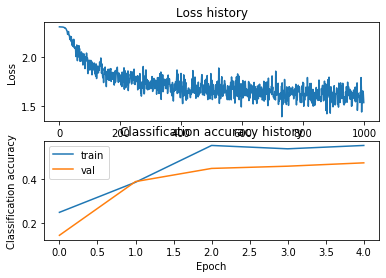

lr = 0.001000 ,reg = 1.500000, hidden layer = 500

iteration 0 / 1000: loss 2.314159
iteration 100 / 1000: loss 2.021042
iteration 200 / 1000: loss 1.802864
iteration 300 / 1000: loss 1.649962
iteration 400 / 1000: loss 1.543402
iteration 500 / 1000: loss 1.592287
iteration 600 / 1000: loss 1.761566
iteration 700 / 1000: loss 1.591545
iteration 800 / 1000: loss 1.586844
iteration 900 / 1000: loss 1.624971
validation accuracy 0.48


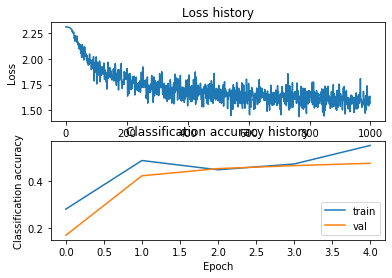

lr = 0.001000 ,reg = 1.750000, hidden layer = 50

iteration 0 / 1000: loss 2.303925
iteration 100 / 1000: loss 1.890033
iteration 200 / 1000: loss 1.892117
iteration 300 / 1000: loss 1.781802
iteration 400 / 1000: loss 1.762750
iteration 500 / 1000: loss 1.718178
iteration 600 / 1000: loss 1.750602
iteration 700 / 1000: loss 1.677145
iteration 800 / 1000: loss 1.725119
iteration 900 / 1000: loss 1.570539
validation accuracy 0.455


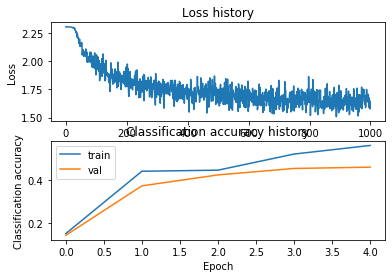

lr = 0.001000 ,reg = 1.750000, hidden layer = 60

iteration 0 / 1000: loss 2.304203
iteration 100 / 1000: loss 2.027938
iteration 200 / 1000: loss 1.660616
iteration 300 / 1000: loss 1.714036
iteration 400 / 1000: loss 1.653252
iteration 500 / 1000: loss 1.667215
iteration 600 / 1000: loss 1.676855
iteration 700 / 1000: loss 1.661883
iteration 800 / 1000: loss 1.568280
iteration 900 / 1000: loss 1.645628
validation accuracy 0.458


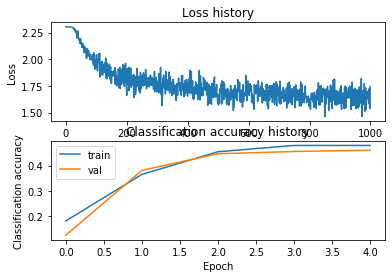

lr = 0.001000 ,reg = 1.750000, hidden layer = 70

iteration 0 / 1000: loss 2.304498
iteration 100 / 1000: loss 1.964024
iteration 200 / 1000: loss 1.835888
iteration 300 / 1000: loss 1.642959
iteration 400 / 1000: loss 1.767870
iteration 500 / 1000: loss 1.772520
iteration 600 / 1000: loss 1.561566
iteration 700 / 1000: loss 1.684040
iteration 800 / 1000: loss 1.715748
iteration 900 / 1000: loss 1.631763
validation accuracy 0.464


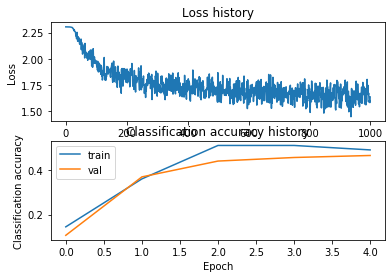

lr = 0.001000 ,reg = 1.750000, hidden layer = 80

iteration 0 / 1000: loss 2.304734
iteration 100 / 1000: loss 1.936862
iteration 200 / 1000: loss 1.925252
iteration 300 / 1000: loss 1.748718
iteration 400 / 1000: loss 1.778501
iteration 500 / 1000: loss 1.657053
iteration 600 / 1000: loss 1.644016
iteration 700 / 1000: loss 1.726803
iteration 800 / 1000: loss 1.566447
iteration 900 / 1000: loss 1.571053
validation accuracy 0.446


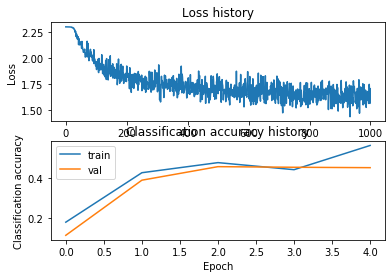

lr = 0.001000 ,reg = 1.750000, hidden layer = 90

iteration 0 / 1000: loss 2.304971
iteration 100 / 1000: loss 1.941961
iteration 200 / 1000: loss 1.904042
iteration 300 / 1000: loss 1.712774
iteration 400 / 1000: loss 1.696397
iteration 500 / 1000: loss 1.685873
iteration 600 / 1000: loss 1.743596
iteration 700 / 1000: loss 1.579186
iteration 800 / 1000: loss 1.547395
iteration 900 / 1000: loss 1.590223
validation accuracy 0.457


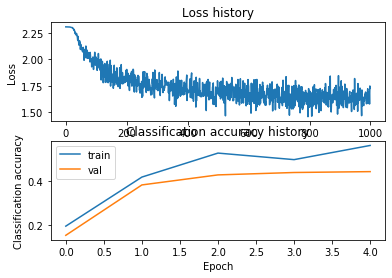

lr = 0.001000 ,reg = 1.750000, hidden layer = 100

iteration 0 / 1000: loss 2.305261
iteration 100 / 1000: loss 1.872667
iteration 200 / 1000: loss 1.778448
iteration 300 / 1000: loss 1.789766
iteration 400 / 1000: loss 1.675217
iteration 500 / 1000: loss 1.713129
iteration 600 / 1000: loss 1.672175
iteration 700 / 1000: loss 1.629275
iteration 800 / 1000: loss 1.651978
iteration 900 / 1000: loss 1.705761
validation accuracy 0.464


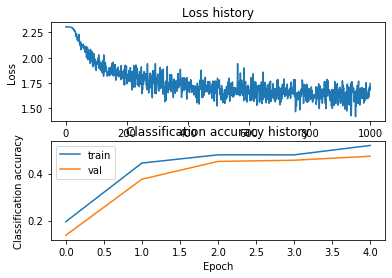

lr = 0.001000 ,reg = 1.750000, hidden layer = 200

iteration 0 / 1000: loss 2.307964
iteration 100 / 1000: loss 1.894551
iteration 200 / 1000: loss 1.767799
iteration 300 / 1000: loss 1.733744
iteration 400 / 1000: loss 1.767029
iteration 500 / 1000: loss 1.672049
iteration 600 / 1000: loss 1.761692
iteration 700 / 1000: loss 1.728404
iteration 800 / 1000: loss 1.611960
iteration 900 / 1000: loss 1.844099
validation accuracy 0.486


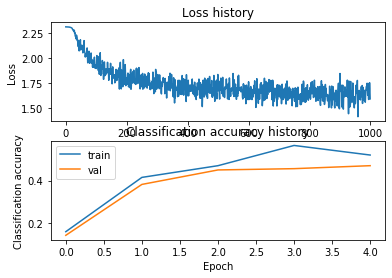

lr = 0.001000 ,reg = 1.750000, hidden layer = 500

iteration 0 / 1000: loss 2.316051
iteration 100 / 1000: loss 1.966305
iteration 200 / 1000: loss 1.608647
iteration 300 / 1000: loss 1.730024
iteration 400 / 1000: loss 1.712458
iteration 500 / 1000: loss 1.706729
iteration 600 / 1000: loss 1.643622
iteration 700 / 1000: loss 1.696621
iteration 800 / 1000: loss 1.599021
iteration 900 / 1000: loss 1.689068
validation accuracy 0.483


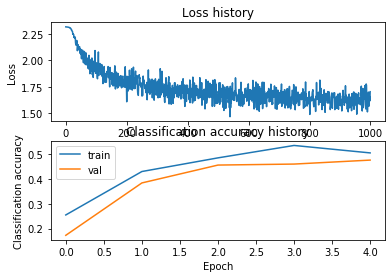

lr = 0.001000 ,reg = 2.000000, hidden layer = 50

iteration 0 / 1000: loss 2.304139
iteration 100 / 1000: loss 1.999391
iteration 200 / 1000: loss 1.889753
iteration 300 / 1000: loss 1.877291
iteration 400 / 1000: loss 1.771650
iteration 500 / 1000: loss 1.693918
iteration 600 / 1000: loss 1.602719
iteration 700 / 1000: loss 1.711448
iteration 800 / 1000: loss 1.712767
iteration 900 / 1000: loss 1.749672
validation accuracy 0.453


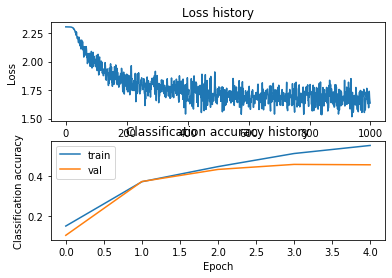

lr = 0.001000 ,reg = 2.000000, hidden layer = 60

iteration 0 / 1000: loss 2.304434
iteration 100 / 1000: loss 1.972496
iteration 200 / 1000: loss 1.761581
iteration 300 / 1000: loss 1.713011
iteration 400 / 1000: loss 1.707404
iteration 500 / 1000: loss 1.662985
iteration 600 / 1000: loss 1.753628
iteration 700 / 1000: loss 1.770927
iteration 800 / 1000: loss 1.628943
iteration 900 / 1000: loss 1.681918
validation accuracy 0.459


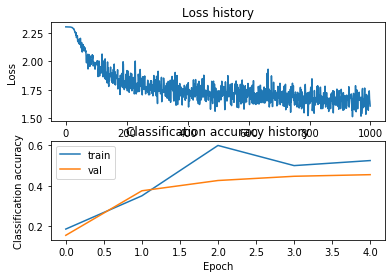

lr = 0.001000 ,reg = 2.000000, hidden layer = 70

iteration 0 / 1000: loss 2.304731
iteration 100 / 1000: loss 1.916695
iteration 200 / 1000: loss 1.800399
iteration 300 / 1000: loss 1.649021
iteration 400 / 1000: loss 1.646255
iteration 500 / 1000: loss 1.671804
iteration 600 / 1000: loss 1.537662
iteration 700 / 1000: loss 1.758768
iteration 800 / 1000: loss 1.550672
iteration 900 / 1000: loss 1.660707
validation accuracy 0.463


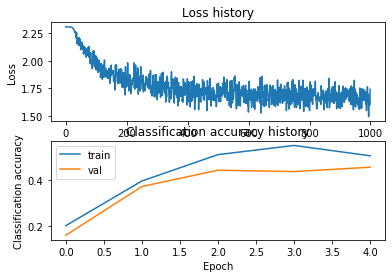

lr = 0.001000 ,reg = 2.000000, hidden layer = 80

iteration 0 / 1000: loss 2.305037
iteration 100 / 1000: loss 1.965648
iteration 200 / 1000: loss 1.869424
iteration 300 / 1000: loss 1.917682
iteration 400 / 1000: loss 1.751358
iteration 500 / 1000: loss 1.744913
iteration 600 / 1000: loss 1.708062
iteration 700 / 1000: loss 1.689088
iteration 800 / 1000: loss 1.697216
iteration 900 / 1000: loss 1.647214
validation accuracy 0.451


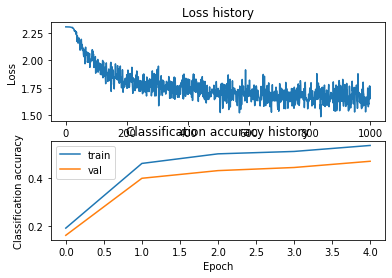

lr = 0.001000 ,reg = 2.000000, hidden layer = 90

iteration 0 / 1000: loss 2.305376
iteration 100 / 1000: loss 1.941719
iteration 200 / 1000: loss 1.780704
iteration 300 / 1000: loss 1.694673
iteration 400 / 1000: loss 1.715140
iteration 500 / 1000: loss 1.922532
iteration 600 / 1000: loss 1.625157
iteration 700 / 1000: loss 1.741488
iteration 800 / 1000: loss 1.690997
iteration 900 / 1000: loss 1.714545
validation accuracy 0.466


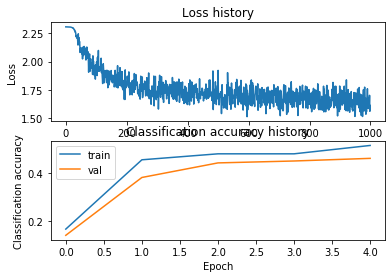

lr = 0.001000 ,reg = 2.000000, hidden layer = 100

iteration 0 / 1000: loss 2.305680
iteration 100 / 1000: loss 1.952701
iteration 200 / 1000: loss 1.815454
iteration 300 / 1000: loss 1.746676
iteration 400 / 1000: loss 1.744620
iteration 500 / 1000: loss 1.711564
iteration 600 / 1000: loss 1.691318
iteration 700 / 1000: loss 1.707578
iteration 800 / 1000: loss 1.592557
iteration 900 / 1000: loss 1.609128
validation accuracy 0.47


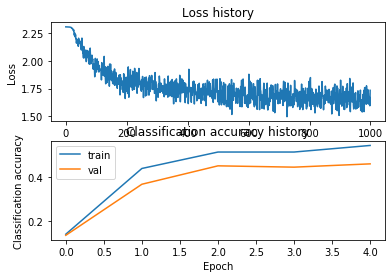

lr = 0.001000 ,reg = 2.000000, hidden layer = 200

iteration 0 / 1000: loss 2.308746
iteration 100 / 1000: loss 1.832076
iteration 200 / 1000: loss 1.805763
iteration 300 / 1000: loss 1.796972
iteration 400 / 1000: loss 1.826958
iteration 500 / 1000: loss 1.692564
iteration 600 / 1000: loss 1.704550
iteration 700 / 1000: loss 1.680636
iteration 800 / 1000: loss 1.645723
iteration 900 / 1000: loss 1.661913
validation accuracy 0.474


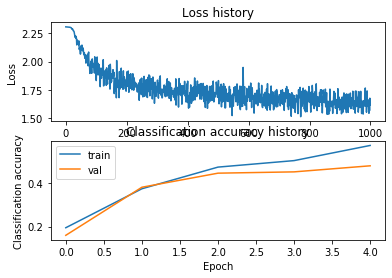

lr = 0.001000 ,reg = 2.000000, hidden layer = 500

iteration 0 / 1000: loss 2.318019
iteration 100 / 1000: loss 2.039438
iteration 200 / 1000: loss 1.778585
iteration 300 / 1000: loss 1.588248
iteration 400 / 1000: loss 1.709590
iteration 500 / 1000: loss 1.586330
iteration 600 / 1000: loss 1.641136
iteration 700 / 1000: loss 1.589544
iteration 800 / 1000: loss 1.756592
iteration 900 / 1000: loss 1.552925
validation accuracy 0.472


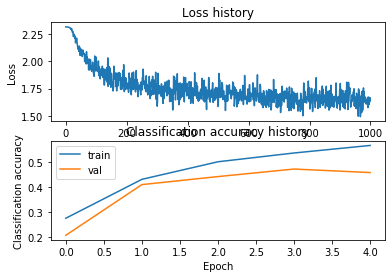

lr = 0.002000 ,reg = 0.250000, hidden layer = 50

iteration 0 / 1000: loss 2.302797
iteration 100 / 1000: loss 1.746212
iteration 200 / 1000: loss 1.637448
iteration 300 / 1000: loss 1.630974
iteration 400 / 1000: loss 1.464258
iteration 500 / 1000: loss 1.605534
iteration 600 / 1000: loss 1.607563
iteration 700 / 1000: loss 1.675263
iteration 800 / 1000: loss 1.420206
iteration 900 / 1000: loss 1.621307
validation accuracy 0.465


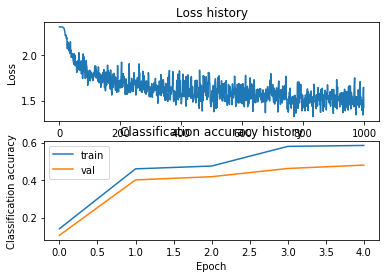

lr = 0.002000 ,reg = 0.250000, hidden layer = 60

iteration 0 / 1000: loss 2.302797
iteration 100 / 1000: loss 1.846552
iteration 200 / 1000: loss 1.673765
iteration 300 / 1000: loss 1.552473
iteration 400 / 1000: loss 1.700768
iteration 500 / 1000: loss 1.649412
iteration 600 / 1000: loss 1.552704
iteration 700 / 1000: loss 1.664590
iteration 800 / 1000: loss 1.544522
iteration 900 / 1000: loss 1.452760
validation accuracy 0.499


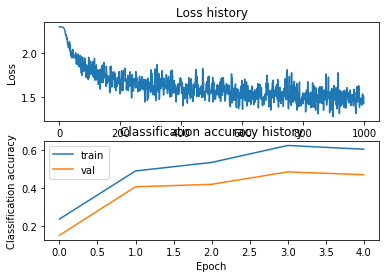

lr = 0.002000 ,reg = 0.250000, hidden layer = 70

iteration 0 / 1000: loss 2.302831
iteration 100 / 1000: loss 1.764120
iteration 200 / 1000: loss 1.477490
iteration 300 / 1000: loss 1.595483
iteration 400 / 1000: loss 1.554201
iteration 500 / 1000: loss 1.645529
iteration 600 / 1000: loss 1.688252
iteration 700 / 1000: loss 1.537435
iteration 800 / 1000: loss 1.507777
iteration 900 / 1000: loss 1.446760
validation accuracy 0.48


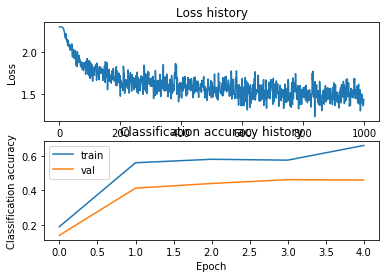

lr = 0.002000 ,reg = 0.250000, hidden layer = 80

iteration 0 / 1000: loss 2.302891
iteration 100 / 1000: loss 1.748193
iteration 200 / 1000: loss 1.650717
iteration 300 / 1000: loss 1.635401
iteration 400 / 1000: loss 1.532000
iteration 500 / 1000: loss 1.582680
iteration 600 / 1000: loss 1.536761
iteration 700 / 1000: loss 1.642068
iteration 800 / 1000: loss 1.469668
iteration 900 / 1000: loss 1.646405
validation accuracy 0.471


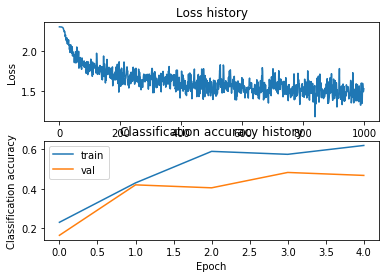

lr = 0.002000 ,reg = 0.250000, hidden layer = 90

iteration 0 / 1000: loss 2.302888
iteration 100 / 1000: loss 1.883870
iteration 200 / 1000: loss 1.789735
iteration 300 / 1000: loss 1.718009
iteration 400 / 1000: loss 1.499712
iteration 500 / 1000: loss 1.643663
iteration 600 / 1000: loss 1.356232
iteration 700 / 1000: loss 1.587821
iteration 800 / 1000: loss 1.573874
iteration 900 / 1000: loss 1.561229
validation accuracy 0.473


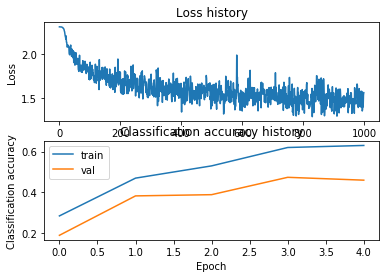

lr = 0.002000 ,reg = 0.250000, hidden layer = 100

iteration 0 / 1000: loss 2.302973
iteration 100 / 1000: loss 1.847208
iteration 200 / 1000: loss 1.684227
iteration 300 / 1000: loss 1.665022
iteration 400 / 1000: loss 1.592051
iteration 500 / 1000: loss 1.507197
iteration 600 / 1000: loss 1.505373
iteration 700 / 1000: loss 1.542369
iteration 800 / 1000: loss 1.482890
iteration 900 / 1000: loss 1.412282
validation accuracy 0.491


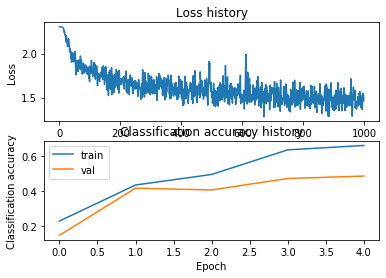

lr = 0.002000 ,reg = 0.250000, hidden layer = 200

iteration 0 / 1000: loss 2.303356
iteration 100 / 1000: loss 1.778602
iteration 200 / 1000: loss 1.658644
iteration 300 / 1000: loss 1.602121
iteration 400 / 1000: loss 1.585695
iteration 500 / 1000: loss 1.552034
iteration 600 / 1000: loss 1.673037
iteration 700 / 1000: loss 1.308228
iteration 800 / 1000: loss 1.322821
iteration 900 / 1000: loss 1.380997
validation accuracy 0.487


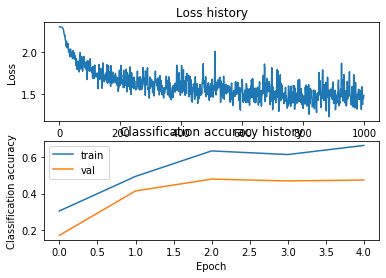

lr = 0.002000 ,reg = 0.250000, hidden layer = 500

iteration 0 / 1000: loss 2.304304
iteration 100 / 1000: loss 1.779557
iteration 200 / 1000: loss 1.557692
iteration 300 / 1000: loss 1.593919
iteration 400 / 1000: loss 1.445561
iteration 500 / 1000: loss 1.505321
iteration 600 / 1000: loss 1.446930
iteration 700 / 1000: loss 1.483851
iteration 800 / 1000: loss 1.520363
iteration 900 / 1000: loss 1.416293
validation accuracy 0.479


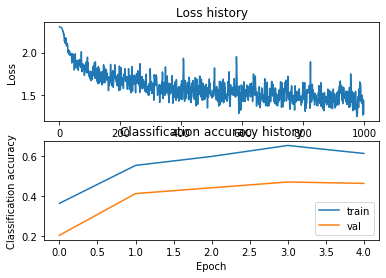

lr = 0.002000 ,reg = 0.500000, hidden layer = 50

iteration 0 / 1000: loss 2.302958
iteration 100 / 1000: loss 1.863951
iteration 200 / 1000: loss 1.709040
iteration 300 / 1000: loss 1.749076
iteration 400 / 1000: loss 1.602415
iteration 500 / 1000: loss 1.741639
iteration 600 / 1000: loss 1.700195
iteration 700 / 1000: loss 1.685520
iteration 800 / 1000: loss 1.606226
iteration 900 / 1000: loss 1.634731
validation accuracy 0.458


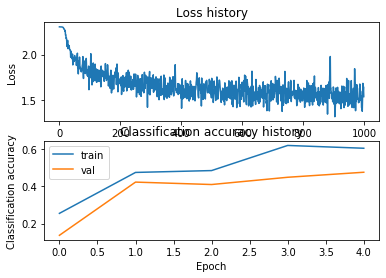

lr = 0.002000 ,reg = 0.500000, hidden layer = 60

iteration 0 / 1000: loss 2.303076
iteration 100 / 1000: loss 1.687918
iteration 200 / 1000: loss 1.735046
iteration 300 / 1000: loss 1.592214
iteration 400 / 1000: loss 1.610419
iteration 500 / 1000: loss 1.649607
iteration 600 / 1000: loss 1.441487
iteration 700 / 1000: loss 1.579684
iteration 800 / 1000: loss 1.596209
iteration 900 / 1000: loss 1.515456
validation accuracy 0.456


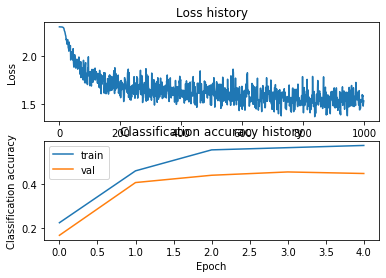

lr = 0.002000 ,reg = 0.500000, hidden layer = 70

iteration 0 / 1000: loss 2.303110
iteration 100 / 1000: loss 1.705803
iteration 200 / 1000: loss 1.774043
iteration 300 / 1000: loss 1.650806
iteration 400 / 1000: loss 1.693189
iteration 500 / 1000: loss 1.758785
iteration 600 / 1000: loss 1.573103
iteration 700 / 1000: loss 1.626790
iteration 800 / 1000: loss 1.523549
iteration 900 / 1000: loss 1.609220
validation accuracy 0.468


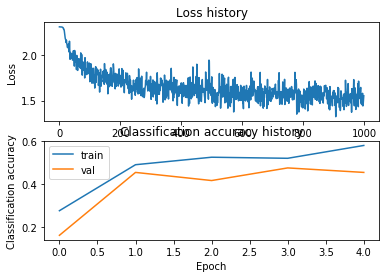

lr = 0.002000 ,reg = 0.500000, hidden layer = 80

iteration 0 / 1000: loss 2.303215
iteration 100 / 1000: loss 1.786734
iteration 200 / 1000: loss 1.724672
iteration 300 / 1000: loss 1.586662
iteration 400 / 1000: loss 1.759897
iteration 500 / 1000: loss 1.824993
iteration 600 / 1000: loss 1.492686
iteration 700 / 1000: loss 1.647063
iteration 800 / 1000: loss 1.562462
iteration 900 / 1000: loss 1.463582
validation accuracy 0.484


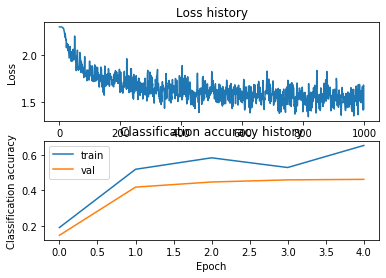

lr = 0.002000 ,reg = 0.500000, hidden layer = 90

iteration 0 / 1000: loss 2.303264
iteration 100 / 1000: loss 1.819020
iteration 200 / 1000: loss 1.733692
iteration 300 / 1000: loss 1.669919
iteration 400 / 1000: loss 1.537469
iteration 500 / 1000: loss 1.615202
iteration 600 / 1000: loss 1.631938
iteration 700 / 1000: loss 1.565646
iteration 800 / 1000: loss 1.435219
iteration 900 / 1000: loss 1.507635
validation accuracy 0.482


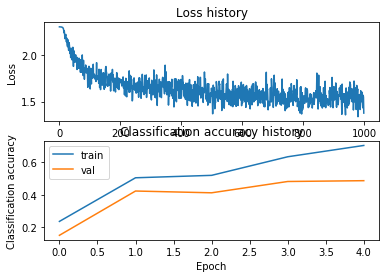

lr = 0.002000 ,reg = 0.500000, hidden layer = 100

iteration 0 / 1000: loss 2.303385
iteration 100 / 1000: loss 1.835246
iteration 200 / 1000: loss 1.877755
iteration 300 / 1000: loss 1.868843
iteration 400 / 1000: loss 1.756863
iteration 500 / 1000: loss 1.558667
iteration 600 / 1000: loss 1.491919
iteration 700 / 1000: loss 1.610548
iteration 800 / 1000: loss 1.488410
iteration 900 / 1000: loss 1.514814
validation accuracy 0.465


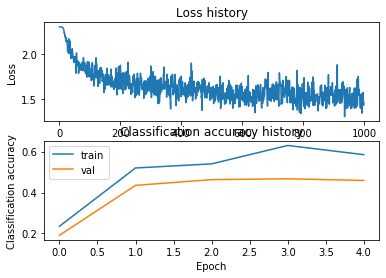

lr = 0.002000 ,reg = 0.500000, hidden layer = 200

iteration 0 / 1000: loss 2.304149
iteration 100 / 1000: loss 1.744255
iteration 200 / 1000: loss 1.559205
iteration 300 / 1000: loss 1.519089
iteration 400 / 1000: loss 1.532604
iteration 500 / 1000: loss 1.437194
iteration 600 / 1000: loss 1.529326
iteration 700 / 1000: loss 1.408570
iteration 800 / 1000: loss 1.583841
iteration 900 / 1000: loss 1.498573
validation accuracy 0.481


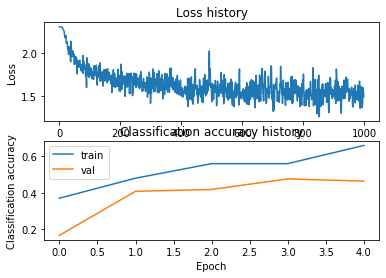

lr = 0.002000 ,reg = 0.500000, hidden layer = 500

iteration 0 / 1000: loss 2.306489
iteration 100 / 1000: loss 1.811358
iteration 200 / 1000: loss 1.698683
iteration 300 / 1000: loss 1.567289
iteration 400 / 1000: loss 1.615577
iteration 500 / 1000: loss 1.694194
iteration 600 / 1000: loss 1.505235
iteration 700 / 1000: loss 1.546509
iteration 800 / 1000: loss 1.581166
iteration 900 / 1000: loss 1.404074
validation accuracy 0.506


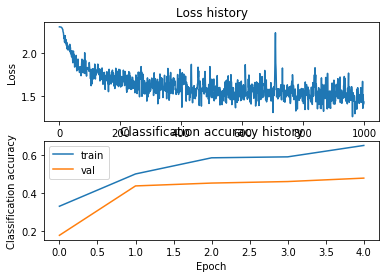

lr = 0.002000 ,reg = 0.750000, hidden layer = 50

iteration 0 / 1000: loss 2.303143
iteration 100 / 1000: loss 1.814565
iteration 200 / 1000: loss 1.666112
iteration 300 / 1000: loss 1.657987
iteration 400 / 1000: loss 1.672359
iteration 500 / 1000: loss 1.785948
iteration 600 / 1000: loss 1.728440
iteration 700 / 1000: loss 1.565174
iteration 800 / 1000: loss 1.529832
iteration 900 / 1000: loss 1.529932
validation accuracy 0.472


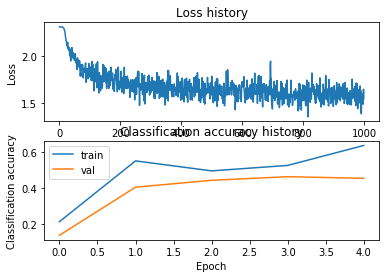

lr = 0.002000 ,reg = 0.750000, hidden layer = 60

iteration 0 / 1000: loss 2.303287
iteration 100 / 1000: loss 1.798264
iteration 200 / 1000: loss 1.750718
iteration 300 / 1000: loss 1.644138
iteration 400 / 1000: loss 1.650290
iteration 500 / 1000: loss 1.601218
iteration 600 / 1000: loss 1.625702
iteration 700 / 1000: loss 1.655681
iteration 800 / 1000: loss 1.694822
iteration 900 / 1000: loss 1.588886
validation accuracy 0.475


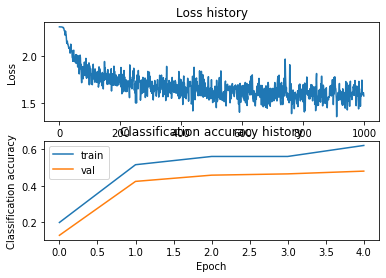

lr = 0.002000 ,reg = 0.750000, hidden layer = 70

iteration 0 / 1000: loss 2.303415
iteration 100 / 1000: loss 1.772399
iteration 200 / 1000: loss 1.683176
iteration 300 / 1000: loss 1.626191
iteration 400 / 1000: loss 1.664610
iteration 500 / 1000: loss 1.564505
iteration 600 / 1000: loss 1.619683
iteration 700 / 1000: loss 1.465887
iteration 800 / 1000: loss 1.656741
iteration 900 / 1000: loss 1.403308
validation accuracy 0.485


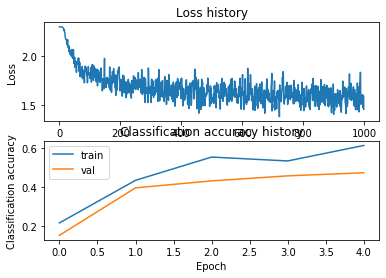

lr = 0.002000 ,reg = 0.750000, hidden layer = 80

iteration 0 / 1000: loss 2.303528
iteration 100 / 1000: loss 1.876545
iteration 200 / 1000: loss 1.673727
iteration 300 / 1000: loss 1.619021
iteration 400 / 1000: loss 1.564814
iteration 500 / 1000: loss 1.566809
iteration 600 / 1000: loss 1.624760
iteration 700 / 1000: loss 1.557666
iteration 800 / 1000: loss 1.501061
iteration 900 / 1000: loss 1.531416
validation accuracy 0.451


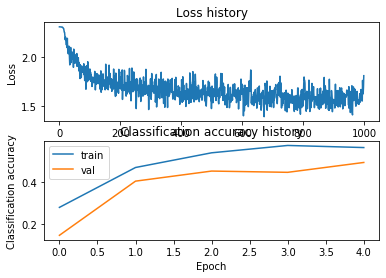

lr = 0.002000 ,reg = 0.750000, hidden layer = 90

iteration 0 / 1000: loss 2.303609
iteration 100 / 1000: loss 1.773298
iteration 200 / 1000: loss 1.651095
iteration 300 / 1000: loss 1.716661
iteration 400 / 1000: loss 1.585818
iteration 500 / 1000: loss 1.550074
iteration 600 / 1000: loss 1.619424
iteration 700 / 1000: loss 1.656386
iteration 800 / 1000: loss 1.704750
iteration 900 / 1000: loss 1.510819
validation accuracy 0.472


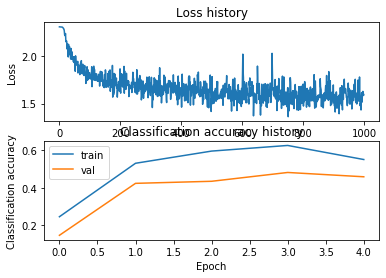

lr = 0.002000 ,reg = 0.750000, hidden layer = 100

iteration 0 / 1000: loss 2.303707
iteration 100 / 1000: loss 1.773232
iteration 200 / 1000: loss 1.607030
iteration 300 / 1000: loss 1.679491
iteration 400 / 1000: loss 1.641243
iteration 500 / 1000: loss 1.775864
iteration 600 / 1000: loss 1.647722
iteration 700 / 1000: loss 1.542736
iteration 800 / 1000: loss 1.485349
iteration 900 / 1000: loss 1.537128
validation accuracy 0.469


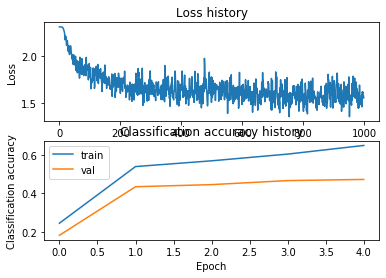

lr = 0.002000 ,reg = 0.750000, hidden layer = 200

iteration 0 / 1000: loss 2.304867
iteration 100 / 1000: loss 1.769124
iteration 200 / 1000: loss 1.821266
iteration 300 / 1000: loss 1.643810
iteration 400 / 1000: loss 1.727616
iteration 500 / 1000: loss 1.598464
iteration 600 / 1000: loss 1.577850
iteration 700 / 1000: loss 1.559708
iteration 800 / 1000: loss 1.627189
iteration 900 / 1000: loss 1.588358
validation accuracy 0.468


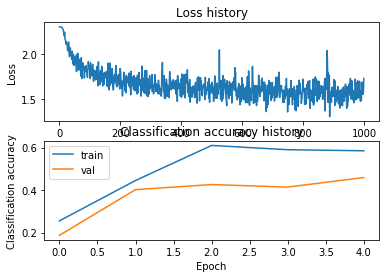

lr = 0.002000 ,reg = 0.750000, hidden layer = 500

iteration 0 / 1000: loss 2.308317
iteration 100 / 1000: loss 1.755374
iteration 200 / 1000: loss 1.591924
iteration 300 / 1000: loss 1.694328
iteration 400 / 1000: loss 1.630500
iteration 500 / 1000: loss 1.638349
iteration 600 / 1000: loss 1.495617
iteration 700 / 1000: loss 1.602537
iteration 800 / 1000: loss 1.443698
iteration 900 / 1000: loss 1.481538
validation accuracy 0.481


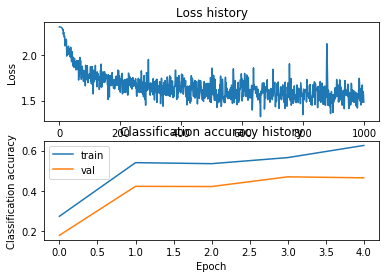

lr = 0.002000 ,reg = 1.000000, hidden layer = 50

iteration 0 / 1000: loss 2.303350
iteration 100 / 1000: loss 1.918856
iteration 200 / 1000: loss 1.766552
iteration 300 / 1000: loss 1.693375
iteration 400 / 1000: loss 1.636976
iteration 500 / 1000: loss 1.550364
iteration 600 / 1000: loss 1.656265
iteration 700 / 1000: loss 1.673774
iteration 800 / 1000: loss 1.543705
iteration 900 / 1000: loss 1.628484
validation accuracy 0.454


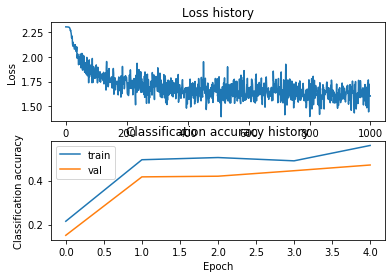

lr = 0.002000 ,reg = 1.000000, hidden layer = 60

iteration 0 / 1000: loss 2.303498
iteration 100 / 1000: loss 1.798482
iteration 200 / 1000: loss 1.909308
iteration 300 / 1000: loss 1.782507
iteration 400 / 1000: loss 1.679387
iteration 500 / 1000: loss 1.701132
iteration 600 / 1000: loss 1.615110
iteration 700 / 1000: loss 1.599920
iteration 800 / 1000: loss 1.565481
iteration 900 / 1000: loss 1.519857
validation accuracy 0.453


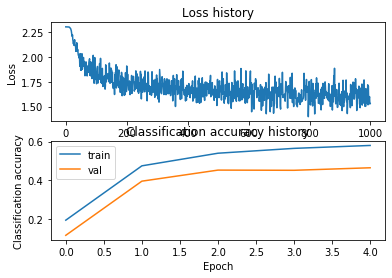

lr = 0.002000 ,reg = 1.000000, hidden layer = 70

iteration 0 / 1000: loss 2.303651
iteration 100 / 1000: loss 1.885934
iteration 200 / 1000: loss 1.691459
iteration 300 / 1000: loss 1.620661
iteration 400 / 1000: loss 1.591134
iteration 500 / 1000: loss 1.620456
iteration 600 / 1000: loss 1.586378
iteration 700 / 1000: loss 1.650460
iteration 800 / 1000: loss 1.623436
iteration 900 / 1000: loss 1.614506
validation accuracy 0.465


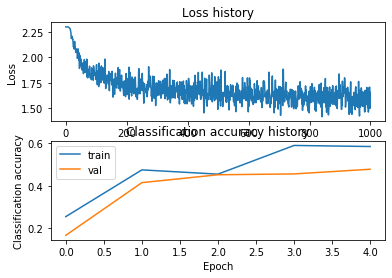

lr = 0.002000 ,reg = 1.000000, hidden layer = 80

iteration 0 / 1000: loss 2.303810
iteration 100 / 1000: loss 1.846921
iteration 200 / 1000: loss 1.646619
iteration 300 / 1000: loss 1.673167
iteration 400 / 1000: loss 1.698216
iteration 500 / 1000: loss 1.695765
iteration 600 / 1000: loss 1.591924
iteration 700 / 1000: loss 1.796697
iteration 800 / 1000: loss 1.576097
iteration 900 / 1000: loss 1.773455
validation accuracy 0.478


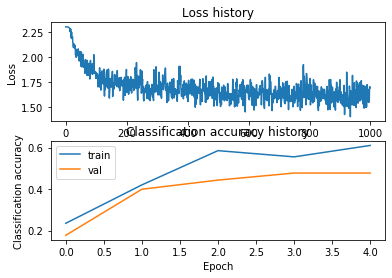

lr = 0.002000 ,reg = 1.000000, hidden layer = 90

iteration 0 / 1000: loss 2.303990
iteration 100 / 1000: loss 1.824829
iteration 200 / 1000: loss 1.699159
iteration 300 / 1000: loss 1.671834
iteration 400 / 1000: loss 1.550150
iteration 500 / 1000: loss 1.709814
iteration 600 / 1000: loss 1.660570
iteration 700 / 1000: loss 1.627754
iteration 800 / 1000: loss 1.605386
iteration 900 / 1000: loss 1.632124
validation accuracy 0.465


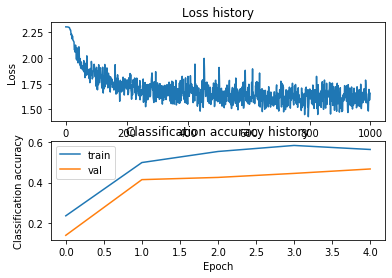

lr = 0.002000 ,reg = 1.000000, hidden layer = 100

iteration 0 / 1000: loss 2.304108
iteration 100 / 1000: loss 1.822636
iteration 200 / 1000: loss 1.755624
iteration 300 / 1000: loss 1.633497
iteration 400 / 1000: loss 1.729965
iteration 500 / 1000: loss 1.688679
iteration 600 / 1000: loss 1.670657
iteration 700 / 1000: loss 1.641254
iteration 800 / 1000: loss 1.578170
iteration 900 / 1000: loss 1.713103
validation accuracy 0.46


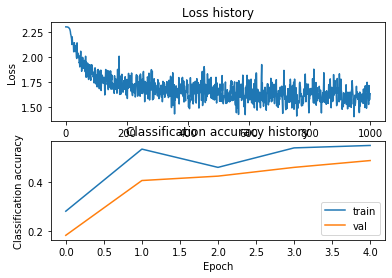

lr = 0.002000 ,reg = 1.000000, hidden layer = 200

iteration 0 / 1000: loss 2.305646
iteration 100 / 1000: loss 1.678907
iteration 200 / 1000: loss 1.649269
iteration 300 / 1000: loss 1.684584
iteration 400 / 1000: loss 1.592396
iteration 500 / 1000: loss 1.545356
iteration 600 / 1000: loss 1.593007
iteration 700 / 1000: loss 1.460800
iteration 800 / 1000: loss 1.628229
iteration 900 / 1000: loss 1.623444
validation accuracy 0.486


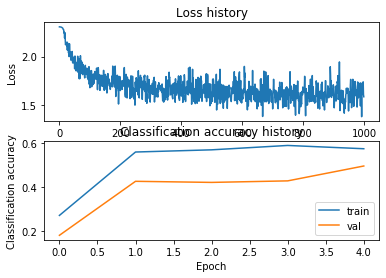

lr = 0.002000 ,reg = 1.000000, hidden layer = 500

iteration 0 / 1000: loss 2.310187
iteration 100 / 1000: loss 1.822975
iteration 200 / 1000: loss 1.739395
iteration 300 / 1000: loss 1.613702
iteration 400 / 1000: loss 1.645438
iteration 500 / 1000: loss 1.538757
iteration 600 / 1000: loss 1.556000
iteration 700 / 1000: loss 1.766461
iteration 800 / 1000: loss 1.644847
iteration 900 / 1000: loss 1.729024
validation accuracy 0.489


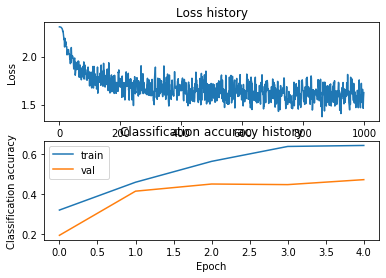

lr = 0.002000 ,reg = 1.250000, hidden layer = 50

iteration 0 / 1000: loss 2.303543
iteration 100 / 1000: loss 1.842008
iteration 200 / 1000: loss 1.795714
iteration 300 / 1000: loss 1.809652
iteration 400 / 1000: loss 1.660201
iteration 500 / 1000: loss 1.673777
iteration 600 / 1000: loss 1.543861
iteration 700 / 1000: loss 1.602303
iteration 800 / 1000: loss 1.720828
iteration 900 / 1000: loss 1.681697
validation accuracy 0.444


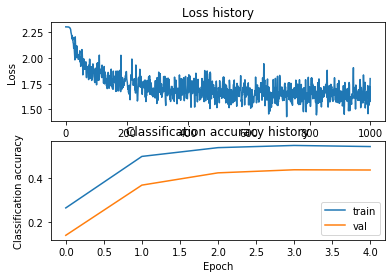

lr = 0.002000 ,reg = 1.250000, hidden layer = 60

iteration 0 / 1000: loss 2.303749
iteration 100 / 1000: loss 1.771706
iteration 200 / 1000: loss 1.762355
iteration 300 / 1000: loss 1.712026
iteration 400 / 1000: loss 1.729493
iteration 500 / 1000: loss 1.723677
iteration 600 / 1000: loss 1.478984
iteration 700 / 1000: loss 1.562626
iteration 800 / 1000: loss 1.561814
iteration 900 / 1000: loss 1.507166
validation accuracy 0.46


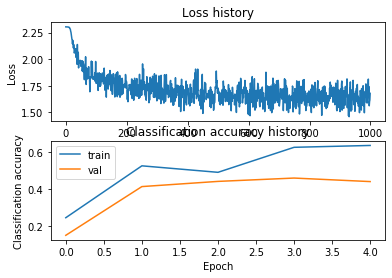

lr = 0.002000 ,reg = 1.250000, hidden layer = 70

iteration 0 / 1000: loss 2.303916
iteration 100 / 1000: loss 1.807422
iteration 200 / 1000: loss 1.763751
iteration 300 / 1000: loss 1.586404
iteration 400 / 1000: loss 1.692736
iteration 500 / 1000: loss 1.619138
iteration 600 / 1000: loss 1.559797
iteration 700 / 1000: loss 1.614772
iteration 800 / 1000: loss 1.698062
iteration 900 / 1000: loss 1.645682
validation accuracy 0.46


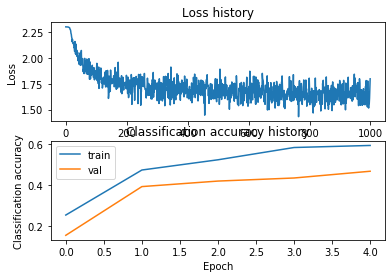

lr = 0.002000 ,reg = 1.250000, hidden layer = 80

iteration 0 / 1000: loss 2.304123
iteration 100 / 1000: loss 1.936180
iteration 200 / 1000: loss 1.832785
iteration 300 / 1000: loss 1.756733
iteration 400 / 1000: loss 1.660695
iteration 500 / 1000: loss 1.694827
iteration 600 / 1000: loss 1.740840
iteration 700 / 1000: loss 1.627069
iteration 800 / 1000: loss 1.686944
iteration 900 / 1000: loss 1.477750
validation accuracy 0.48


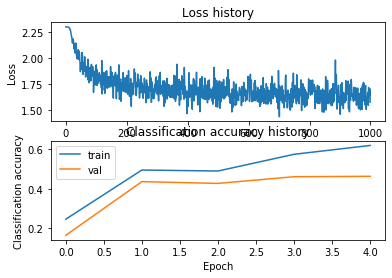

lr = 0.002000 ,reg = 1.250000, hidden layer = 90

iteration 0 / 1000: loss 2.304331
iteration 100 / 1000: loss 1.963007
iteration 200 / 1000: loss 1.855135
iteration 300 / 1000: loss 1.720255
iteration 400 / 1000: loss 1.526874
iteration 500 / 1000: loss 1.607121
iteration 600 / 1000: loss 1.718893
iteration 700 / 1000: loss 1.777922
iteration 800 / 1000: loss 1.672298
iteration 900 / 1000: loss 1.747697
validation accuracy 0.483


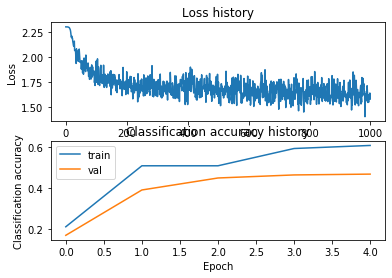

lr = 0.002000 ,reg = 1.250000, hidden layer = 100

iteration 0 / 1000: loss 2.304542
iteration 100 / 1000: loss 1.773893
iteration 200 / 1000: loss 1.736925
iteration 300 / 1000: loss 1.708858
iteration 400 / 1000: loss 1.595513
iteration 500 / 1000: loss 1.702328
iteration 600 / 1000: loss 1.554979
iteration 700 / 1000: loss 1.649676
iteration 800 / 1000: loss 1.706008
iteration 900 / 1000: loss 1.701789
validation accuracy 0.458


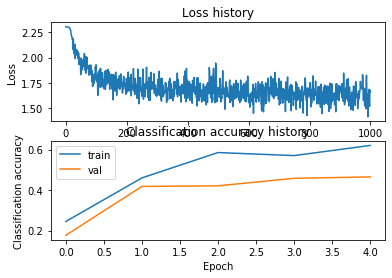

lr = 0.002000 ,reg = 1.250000, hidden layer = 200

iteration 0 / 1000: loss 2.306516
iteration 100 / 1000: loss 1.789782
iteration 200 / 1000: loss 1.695271
iteration 300 / 1000: loss 1.693144
iteration 400 / 1000: loss 1.535391
iteration 500 / 1000: loss 1.588403
iteration 600 / 1000: loss 1.565692
iteration 700 / 1000: loss 1.589336
iteration 800 / 1000: loss 1.673036
iteration 900 / 1000: loss 1.597218
validation accuracy 0.475


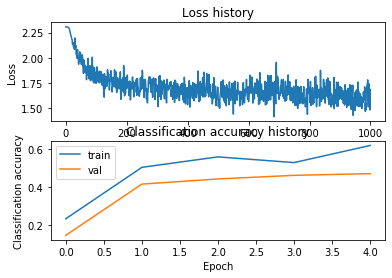

lr = 0.002000 ,reg = 1.250000, hidden layer = 500

iteration 0 / 1000: loss 2.312232
iteration 100 / 1000: loss 1.802221
iteration 200 / 1000: loss 1.661514
iteration 300 / 1000: loss 1.631394
iteration 400 / 1000: loss 1.606474
iteration 500 / 1000: loss 1.787027
iteration 600 / 1000: loss 1.773327
iteration 700 / 1000: loss 1.619199
iteration 800 / 1000: loss 1.815315
iteration 900 / 1000: loss 1.601807
validation accuracy 0.489


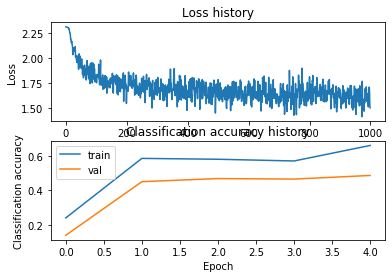

lr = 0.002000 ,reg = 1.500000, hidden layer = 50

iteration 0 / 1000: loss 2.303748
iteration 100 / 1000: loss 1.853794
iteration 200 / 1000: loss 1.722303
iteration 300 / 1000: loss 1.732740
iteration 400 / 1000: loss 1.744287
iteration 500 / 1000: loss 1.625785
iteration 600 / 1000: loss 1.719562
iteration 700 / 1000: loss 1.760501
iteration 800 / 1000: loss 1.658577
iteration 900 / 1000: loss 1.559981
validation accuracy 0.426


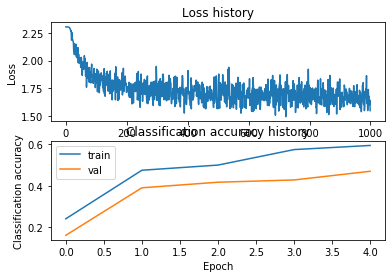

lr = 0.002000 ,reg = 1.500000, hidden layer = 60

iteration 0 / 1000: loss 2.303962
iteration 100 / 1000: loss 1.869341
iteration 200 / 1000: loss 1.713948
iteration 300 / 1000: loss 1.683131
iteration 400 / 1000: loss 1.711949
iteration 500 / 1000: loss 1.732803
iteration 600 / 1000: loss 1.633378
iteration 700 / 1000: loss 1.632408
iteration 800 / 1000: loss 1.745564
iteration 900 / 1000: loss 1.679057
validation accuracy 0.468


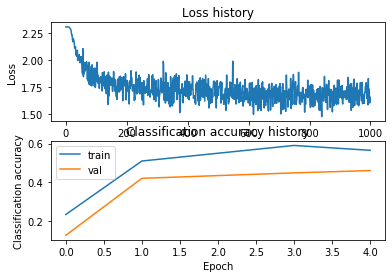

lr = 0.002000 ,reg = 1.500000, hidden layer = 70

iteration 0 / 1000: loss 2.304203
iteration 100 / 1000: loss 1.611867
iteration 200 / 1000: loss 1.727565
iteration 300 / 1000: loss 1.704289
iteration 400 / 1000: loss 1.652607
iteration 500 / 1000: loss 1.689901
iteration 600 / 1000: loss 1.757457
iteration 700 / 1000: loss 1.707357
iteration 800 / 1000: loss 1.873507
iteration 900 / 1000: loss 1.596575
validation accuracy 0.467


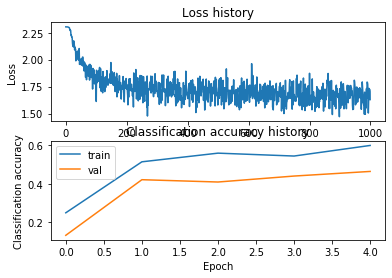

lr = 0.002000 ,reg = 1.500000, hidden layer = 80

iteration 0 / 1000: loss 2.304413
iteration 100 / 1000: loss 1.847931
iteration 200 / 1000: loss 1.768637
iteration 300 / 1000: loss 1.602426
iteration 400 / 1000: loss 1.695411
iteration 500 / 1000: loss 1.671876
iteration 600 / 1000: loss 1.670929
iteration 700 / 1000: loss 1.761281
iteration 800 / 1000: loss 1.775865
iteration 900 / 1000: loss 1.574072
validation accuracy 0.463


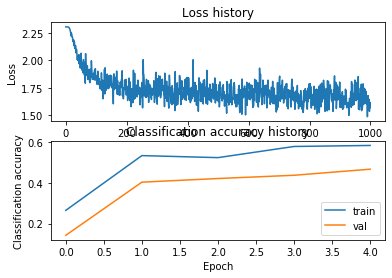

lr = 0.002000 ,reg = 1.500000, hidden layer = 90

iteration 0 / 1000: loss 2.304618
iteration 100 / 1000: loss 1.792329
iteration 200 / 1000: loss 1.707765
iteration 300 / 1000: loss 1.837340
iteration 400 / 1000: loss 1.811580
iteration 500 / 1000: loss 1.687232
iteration 600 / 1000: loss 1.610435
iteration 700 / 1000: loss 1.604856
iteration 800 / 1000: loss 1.650173
iteration 900 / 1000: loss 1.721294
validation accuracy 0.449


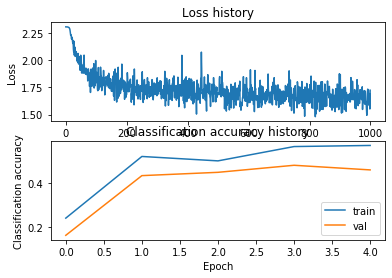

lr = 0.002000 ,reg = 1.500000, hidden layer = 100

iteration 0 / 1000: loss 2.304903
iteration 100 / 1000: loss 1.825653
iteration 200 / 1000: loss 1.770377
iteration 300 / 1000: loss 1.628933
iteration 400 / 1000: loss 1.665165
iteration 500 / 1000: loss 1.771168
iteration 600 / 1000: loss 1.766839
iteration 700 / 1000: loss 1.602144
iteration 800 / 1000: loss 1.579515
iteration 900 / 1000: loss 1.621753
validation accuracy 0.478


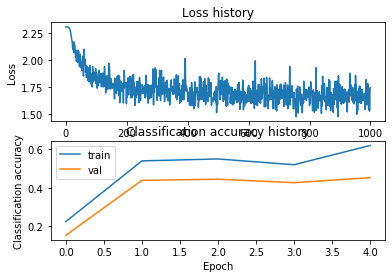

lr = 0.002000 ,reg = 1.500000, hidden layer = 200

iteration 0 / 1000: loss 2.307165
iteration 100 / 1000: loss 1.841975
iteration 200 / 1000: loss 1.653035
iteration 300 / 1000: loss 1.650054
iteration 400 / 1000: loss 1.730743
iteration 500 / 1000: loss 1.847705
iteration 600 / 1000: loss 1.727851
iteration 700 / 1000: loss 1.736604
iteration 800 / 1000: loss 1.731946
iteration 900 / 1000: loss 1.666010
validation accuracy 0.464


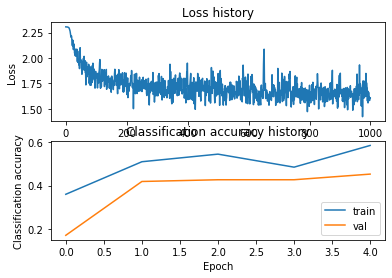

lr = 0.002000 ,reg = 1.500000, hidden layer = 500

iteration 0 / 1000: loss 2.314101
iteration 100 / 1000: loss 1.838979
iteration 200 / 1000: loss 1.720127
iteration 300 / 1000: loss 1.737067
iteration 400 / 1000: loss 1.685818
iteration 500 / 1000: loss 1.665921
iteration 600 / 1000: loss 1.672519
iteration 700 / 1000: loss 1.604815
iteration 800 / 1000: loss 1.676799
iteration 900 / 1000: loss 1.664750
validation accuracy 0.469


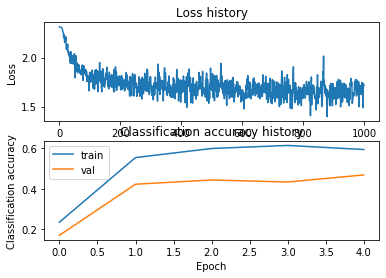

lr = 0.002000 ,reg = 1.750000, hidden layer = 50

iteration 0 / 1000: loss 2.303938
iteration 100 / 1000: loss 1.836714
iteration 200 / 1000: loss 1.889604
iteration 300 / 1000: loss 1.597519
iteration 400 / 1000: loss 1.848631
iteration 500 / 1000: loss 1.613893
iteration 600 / 1000: loss 1.647834
iteration 700 / 1000: loss 1.682093
iteration 800 / 1000: loss 1.713388
iteration 900 / 1000: loss 1.700897
validation accuracy 0.473


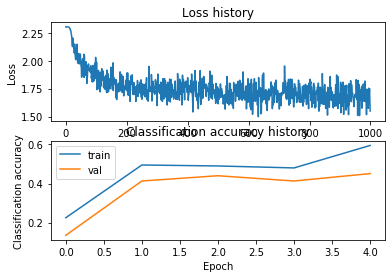

lr = 0.002000 ,reg = 1.750000, hidden layer = 60

iteration 0 / 1000: loss 2.304217
iteration 100 / 1000: loss 1.860105
iteration 200 / 1000: loss 1.735323
iteration 300 / 1000: loss 1.749438
iteration 400 / 1000: loss 1.724727
iteration 500 / 1000: loss 1.624611
iteration 600 / 1000: loss 1.764351
iteration 700 / 1000: loss 1.787240
iteration 800 / 1000: loss 1.690243
iteration 900 / 1000: loss 1.744784
validation accuracy 0.454


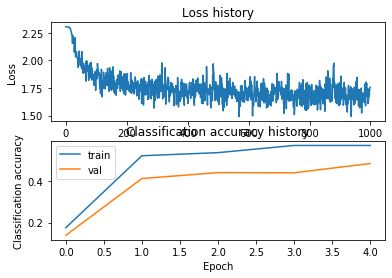

lr = 0.002000 ,reg = 1.750000, hidden layer = 70

iteration 0 / 1000: loss 2.304516
iteration 100 / 1000: loss 1.863856
iteration 200 / 1000: loss 1.739423
iteration 300 / 1000: loss 1.737191
iteration 400 / 1000: loss 1.588079
iteration 500 / 1000: loss 1.754158
iteration 600 / 1000: loss 1.659675
iteration 700 / 1000: loss 1.810805
iteration 800 / 1000: loss 1.677020
iteration 900 / 1000: loss 1.681559
validation accuracy 0.44


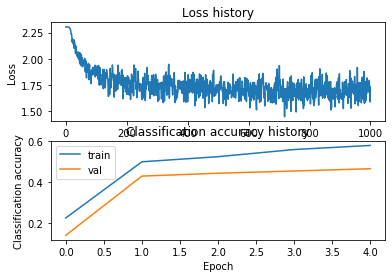

lr = 0.002000 ,reg = 1.750000, hidden layer = 80

iteration 0 / 1000: loss 2.304786
iteration 100 / 1000: loss 1.880612
iteration 200 / 1000: loss 1.780886
iteration 300 / 1000: loss 1.726943
iteration 400 / 1000: loss 1.732477
iteration 500 / 1000: loss 1.685575
iteration 600 / 1000: loss 1.689500
iteration 700 / 1000: loss 1.767643
iteration 800 / 1000: loss 1.651763
iteration 900 / 1000: loss 1.519344
validation accuracy 0.47


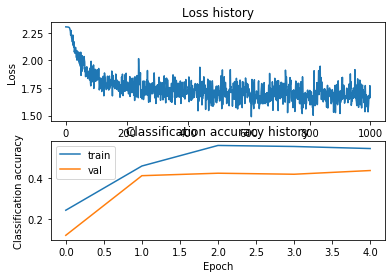

lr = 0.002000 ,reg = 1.750000, hidden layer = 90

iteration 0 / 1000: loss 2.304993
iteration 100 / 1000: loss 1.910246
iteration 200 / 1000: loss 1.792908
iteration 300 / 1000: loss 1.759764
iteration 400 / 1000: loss 1.724518
iteration 500 / 1000: loss 1.743121
iteration 600 / 1000: loss 1.571252
iteration 700 / 1000: loss 1.702149
iteration 800 / 1000: loss 1.646526
iteration 900 / 1000: loss 1.646252
validation accuracy 0.45


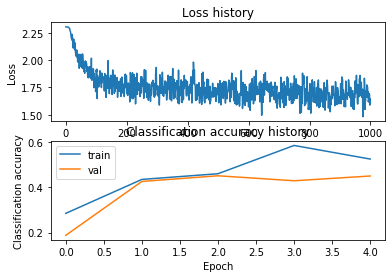

lr = 0.002000 ,reg = 1.750000, hidden layer = 100

iteration 0 / 1000: loss 2.305263
iteration 100 / 1000: loss 1.768194
iteration 200 / 1000: loss 1.655589
iteration 300 / 1000: loss 1.605058
iteration 400 / 1000: loss 1.669949
iteration 500 / 1000: loss 1.715302
iteration 600 / 1000: loss 1.766002
iteration 700 / 1000: loss 1.773445
iteration 800 / 1000: loss 1.718646
iteration 900 / 1000: loss 1.609371
validation accuracy 0.441


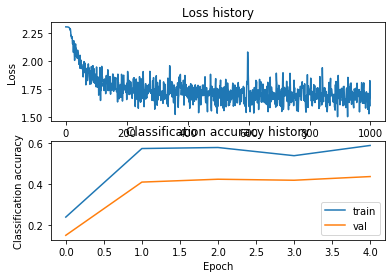

lr = 0.002000 ,reg = 1.750000, hidden layer = 200

iteration 0 / 1000: loss 2.307955
iteration 100 / 1000: loss 1.860484
iteration 200 / 1000: loss 1.796752
iteration 300 / 1000: loss 1.731097
iteration 400 / 1000: loss 1.632697
iteration 500 / 1000: loss 1.665336
iteration 600 / 1000: loss 1.594836
iteration 700 / 1000: loss 1.527283
iteration 800 / 1000: loss 1.639295
iteration 900 / 1000: loss 1.638805
validation accuracy 0.467


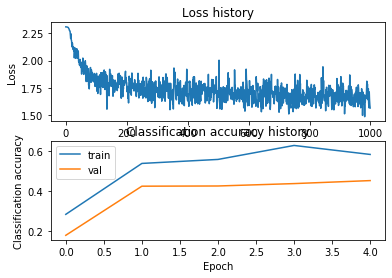

lr = 0.002000 ,reg = 1.750000, hidden layer = 500

iteration 0 / 1000: loss 2.316044
iteration 100 / 1000: loss 1.740055
iteration 200 / 1000: loss 1.622255
iteration 300 / 1000: loss 1.679409
iteration 400 / 1000: loss 1.714666
iteration 500 / 1000: loss 1.777071
iteration 600 / 1000: loss 1.722915
iteration 700 / 1000: loss 1.705168
iteration 800 / 1000: loss 1.582312
iteration 900 / 1000: loss 1.622426
validation accuracy 0.481


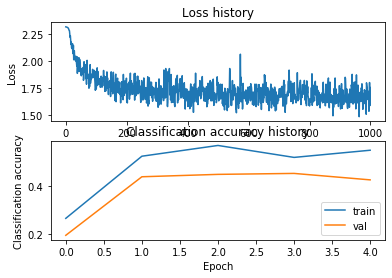

lr = 0.002000 ,reg = 2.000000, hidden layer = 50

iteration 0 / 1000: loss 2.304144
iteration 100 / 1000: loss 1.808407
iteration 200 / 1000: loss 1.700710
iteration 300 / 1000: loss 1.856488
iteration 400 / 1000: loss 1.738123
iteration 500 / 1000: loss 1.739886
iteration 600 / 1000: loss 1.709181
iteration 700 / 1000: loss 1.771922
iteration 800 / 1000: loss 1.759139
iteration 900 / 1000: loss 1.745254
validation accuracy 0.452


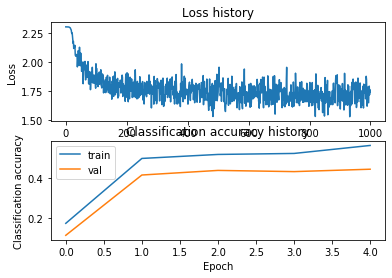

lr = 0.002000 ,reg = 2.000000, hidden layer = 60

iteration 0 / 1000: loss 2.304421
iteration 100 / 1000: loss 1.839243
iteration 200 / 1000: loss 1.700103
iteration 300 / 1000: loss 1.757736
iteration 400 / 1000: loss 1.609726
iteration 500 / 1000: loss 1.555914
iteration 600 / 1000: loss 1.790257
iteration 700 / 1000: loss 1.706331
iteration 800 / 1000: loss 1.736935
iteration 900 / 1000: loss 1.800633
validation accuracy 0.435


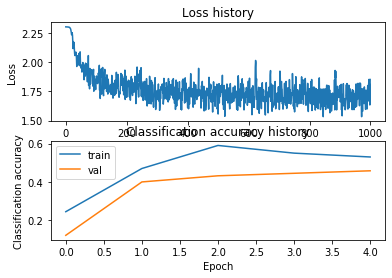

lr = 0.002000 ,reg = 2.000000, hidden layer = 70

iteration 0 / 1000: loss 2.304778
iteration 100 / 1000: loss 1.886003
iteration 200 / 1000: loss 1.841657
iteration 300 / 1000: loss 1.687906
iteration 400 / 1000: loss 1.726310
iteration 500 / 1000: loss 1.765973
iteration 600 / 1000: loss 1.600315
iteration 700 / 1000: loss 1.695949
iteration 800 / 1000: loss 1.679523
iteration 900 / 1000: loss 1.615222
validation accuracy 0.457


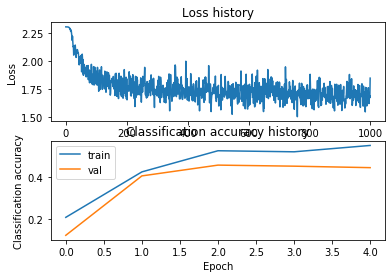

lr = 0.002000 ,reg = 2.000000, hidden layer = 80

iteration 0 / 1000: loss 2.305057
iteration 100 / 1000: loss 1.875609
iteration 200 / 1000: loss 1.732127
iteration 300 / 1000: loss 1.725757
iteration 400 / 1000: loss 1.716361
iteration 500 / 1000: loss 1.730795
iteration 600 / 1000: loss 1.782870
iteration 700 / 1000: loss 1.639726
iteration 800 / 1000: loss 1.725630
iteration 900 / 1000: loss 1.771137
validation accuracy 0.472


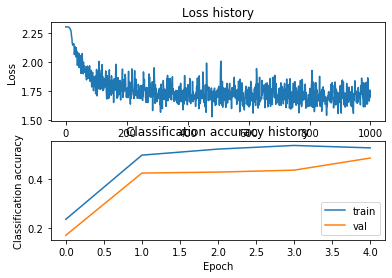

lr = 0.002000 ,reg = 2.000000, hidden layer = 90

iteration 0 / 1000: loss 2.305408
iteration 100 / 1000: loss 1.771378
iteration 200 / 1000: loss 1.886655
iteration 300 / 1000: loss 1.759533
iteration 400 / 1000: loss 1.700651
iteration 500 / 1000: loss 1.757740
iteration 600 / 1000: loss 1.573789
iteration 700 / 1000: loss 1.750580
iteration 800 / 1000: loss 1.737806
iteration 900 / 1000: loss 1.620450
validation accuracy 0.446


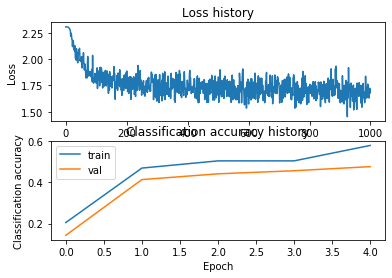

lr = 0.002000 ,reg = 2.000000, hidden layer = 100

iteration 0 / 1000: loss 2.305665
iteration 100 / 1000: loss 1.803549
iteration 200 / 1000: loss 1.727288
iteration 300 / 1000: loss 1.765214
iteration 400 / 1000: loss 1.680807
iteration 500 / 1000: loss 1.833376
iteration 600 / 1000: loss 1.882593
iteration 700 / 1000: loss 1.762562
iteration 800 / 1000: loss 1.691809
iteration 900 / 1000: loss 1.699358
validation accuracy 0.465


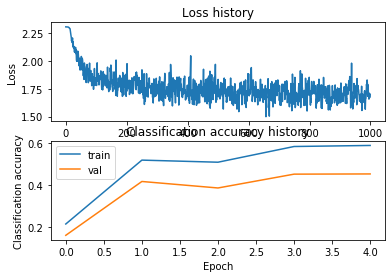

lr = 0.002000 ,reg = 2.000000, hidden layer = 200

iteration 0 / 1000: loss 2.308717
iteration 100 / 1000: loss 1.715465
iteration 200 / 1000: loss 1.731409
iteration 300 / 1000: loss 1.906873
iteration 400 / 1000: loss 1.723992
iteration 500 / 1000: loss 1.658786
iteration 600 / 1000: loss 1.787287
iteration 700 / 1000: loss 1.751113
iteration 800 / 1000: loss 1.695877
iteration 900 / 1000: loss 1.774322
validation accuracy 0.46


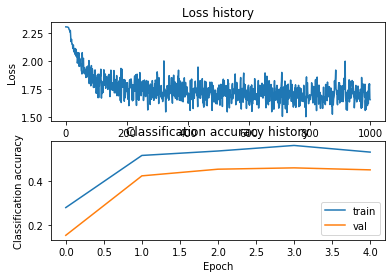

lr = 0.002000 ,reg = 2.000000, hidden layer = 500

iteration 0 / 1000: loss 2.318022
iteration 100 / 1000: loss 1.892463
iteration 200 / 1000: loss 1.733160
iteration 300 / 1000: loss 1.749771
iteration 400 / 1000: loss 1.829139
iteration 500 / 1000: loss 1.752162
iteration 600 / 1000: loss 1.684473
iteration 700 / 1000: loss 1.632478
iteration 800 / 1000: loss 1.785129
iteration 900 / 1000: loss 1.693296
validation accuracy 0.473


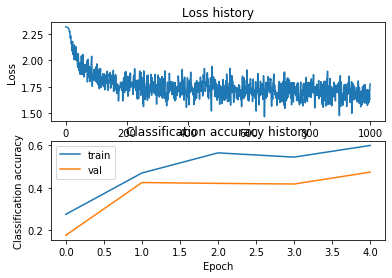

lr = 0.002500 ,reg = 0.250000, hidden layer = 50

iteration 0 / 1000: loss 2.302749
iteration 100 / 1000: loss 1.816856
iteration 200 / 1000: loss 1.883519
iteration 300 / 1000: loss 1.680694
iteration 400 / 1000: loss 1.718821
iteration 500 / 1000: loss 1.759340
iteration 600 / 1000: loss 1.830507
iteration 700 / 1000: loss 1.751005
iteration 800 / 1000: loss 1.565648
iteration 900 / 1000: loss 1.483296
validation accuracy 0.46


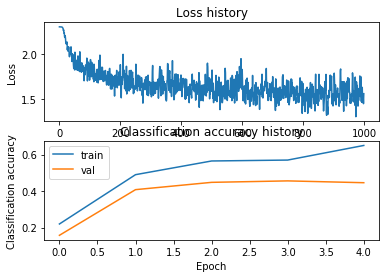

lr = 0.002500 ,reg = 0.250000, hidden layer = 60

iteration 0 / 1000: loss 2.302793
iteration 100 / 1000: loss 1.871611
iteration 200 / 1000: loss 1.696537
iteration 300 / 1000: loss 1.674540
iteration 400 / 1000: loss 1.542409
iteration 500 / 1000: loss 1.592595
iteration 600 / 1000: loss 1.549937
iteration 700 / 1000: loss 1.558923
iteration 800 / 1000: loss 1.529776
iteration 900 / 1000: loss 1.432416
validation accuracy 0.454


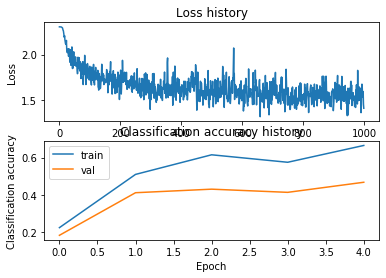

lr = 0.002500 ,reg = 0.250000, hidden layer = 70

iteration 0 / 1000: loss 2.302876
iteration 100 / 1000: loss 1.788563
iteration 200 / 1000: loss 1.806719
iteration 300 / 1000: loss 1.699832
iteration 400 / 1000: loss 1.729474
iteration 500 / 1000: loss 1.694549
iteration 600 / 1000: loss 1.558356
iteration 700 / 1000: loss 1.457478
iteration 800 / 1000: loss 1.850733
iteration 900 / 1000: loss 1.601164
validation accuracy 0.433


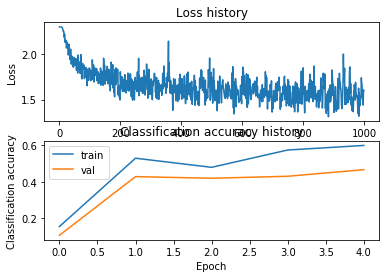

lr = 0.002500 ,reg = 0.250000, hidden layer = 80

iteration 0 / 1000: loss 2.302885
iteration 100 / 1000: loss 1.793068
iteration 200 / 1000: loss 1.903161
iteration 300 / 1000: loss 1.674192
iteration 400 / 1000: loss 1.442172
iteration 500 / 1000: loss 1.602045
iteration 600 / 1000: loss 1.621980
iteration 700 / 1000: loss 1.523620
iteration 800 / 1000: loss 1.477996
iteration 900 / 1000: loss 1.462730
validation accuracy 0.438


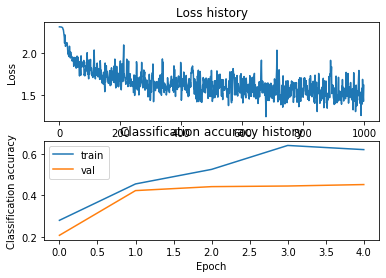

lr = 0.002500 ,reg = 0.250000, hidden layer = 90

iteration 0 / 1000: loss 2.302864
iteration 100 / 1000: loss 1.948921
iteration 200 / 1000: loss 1.970429
iteration 300 / 1000: loss 1.747183
iteration 400 / 1000: loss 1.685735
iteration 500 / 1000: loss 1.557631
iteration 600 / 1000: loss 1.534485
iteration 700 / 1000: loss 1.768928
iteration 800 / 1000: loss 1.500149
iteration 900 / 1000: loss 1.467482
validation accuracy 0.472


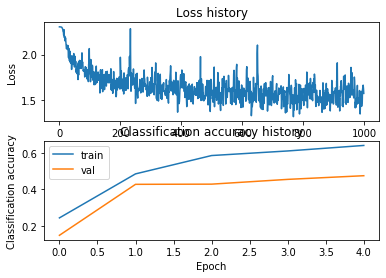

lr = 0.002500 ,reg = 0.250000, hidden layer = 100

iteration 0 / 1000: loss 2.302970
iteration 100 / 1000: loss 1.967220
iteration 200 / 1000: loss 1.738088
iteration 300 / 1000: loss 1.611965
iteration 400 / 1000: loss 1.658865
iteration 500 / 1000: loss 1.705334
iteration 600 / 1000: loss 1.611478
iteration 700 / 1000: loss 1.482001
iteration 800 / 1000: loss 1.439698
iteration 900 / 1000: loss 1.481724
validation accuracy 0.472


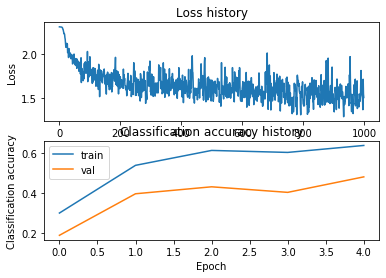

lr = 0.002500 ,reg = 0.250000, hidden layer = 200

iteration 0 / 1000: loss 2.303293
iteration 100 / 1000: loss 1.805563
iteration 200 / 1000: loss 1.680513
iteration 300 / 1000: loss 1.823924
iteration 400 / 1000: loss 1.601567
iteration 500 / 1000: loss 1.802527
iteration 600 / 1000: loss 1.608357
iteration 700 / 1000: loss 1.468172
iteration 800 / 1000: loss 1.530428
iteration 900 / 1000: loss 1.519954
validation accuracy 0.486


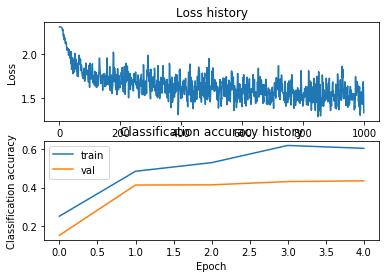

lr = 0.002500 ,reg = 0.250000, hidden layer = 500

iteration 0 / 1000: loss 2.304419
iteration 100 / 1000: loss 1.695639
iteration 200 / 1000: loss 1.665987
iteration 300 / 1000: loss 1.593462
iteration 400 / 1000: loss 1.888960
iteration 500 / 1000: loss 1.585799
iteration 600 / 1000: loss 1.462535
iteration 700 / 1000: loss 1.546466
iteration 800 / 1000: loss 1.660818
iteration 900 / 1000: loss 1.616137
validation accuracy 0.471


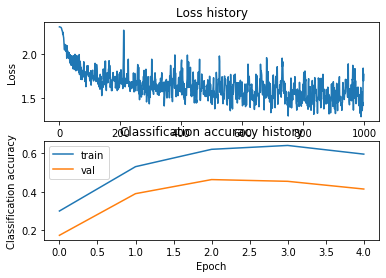

lr = 0.002500 ,reg = 0.500000, hidden layer = 50

iteration 0 / 1000: loss 2.302973
iteration 100 / 1000: loss 1.632563
iteration 200 / 1000: loss 1.797014
iteration 300 / 1000: loss 1.798607
iteration 400 / 1000: loss 1.746494
iteration 500 / 1000: loss 1.639009
iteration 600 / 1000: loss 1.584894
iteration 700 / 1000: loss 1.605829
iteration 800 / 1000: loss 1.587619
iteration 900 / 1000: loss 1.499910
validation accuracy 0.43


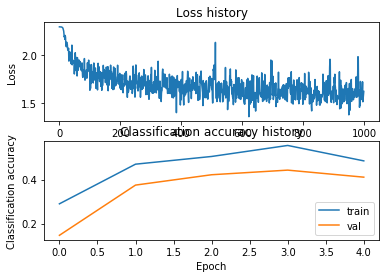

lr = 0.002500 ,reg = 0.500000, hidden layer = 60

iteration 0 / 1000: loss 2.303035
iteration 100 / 1000: loss 1.818123
iteration 200 / 1000: loss 1.872248
iteration 300 / 1000: loss 1.611394
iteration 400 / 1000: loss 1.524356
iteration 500 / 1000: loss 1.541991
iteration 600 / 1000: loss 1.537673
iteration 700 / 1000: loss 1.725722
iteration 800 / 1000: loss 1.597209
iteration 900 / 1000: loss 1.567844
validation accuracy 0.464


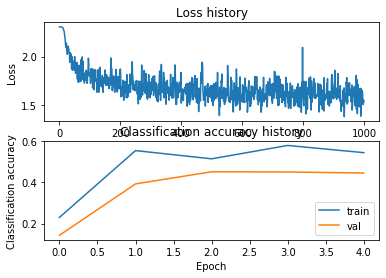

lr = 0.002500 ,reg = 0.500000, hidden layer = 70

iteration 0 / 1000: loss 2.303112
iteration 100 / 1000: loss 1.791337
iteration 200 / 1000: loss 1.704530
iteration 300 / 1000: loss 1.707927
iteration 400 / 1000: loss 1.689993
iteration 500 / 1000: loss 1.540731
iteration 600 / 1000: loss 1.468311
iteration 700 / 1000: loss 1.561842
iteration 800 / 1000: loss 1.433505
iteration 900 / 1000: loss 1.499735
validation accuracy 0.446


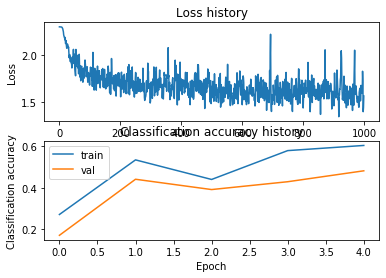

lr = 0.002500 ,reg = 0.500000, hidden layer = 80

iteration 0 / 1000: loss 2.303183
iteration 100 / 1000: loss 1.716651
iteration 200 / 1000: loss 1.828871
iteration 300 / 1000: loss 1.595959
iteration 400 / 1000: loss 1.588955
iteration 500 / 1000: loss 1.470536
iteration 600 / 1000: loss 1.602631
iteration 700 / 1000: loss 1.646499
iteration 800 / 1000: loss 1.583772
iteration 900 / 1000: loss 1.559512
validation accuracy 0.482


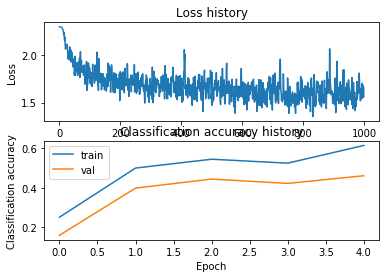

lr = 0.002500 ,reg = 0.500000, hidden layer = 90

iteration 0 / 1000: loss 2.303315
iteration 100 / 1000: loss 1.605737
iteration 200 / 1000: loss 1.634242
iteration 300 / 1000: loss 1.819009
iteration 400 / 1000: loss 1.611472
iteration 500 / 1000: loss 1.452829
iteration 600 / 1000: loss 1.537472
iteration 700 / 1000: loss 1.631584
iteration 800 / 1000: loss 1.744244
iteration 900 / 1000: loss 1.548836
validation accuracy 0.441


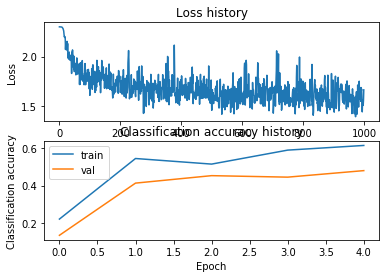

lr = 0.002500 ,reg = 0.500000, hidden layer = 100

iteration 0 / 1000: loss 2.303361
iteration 100 / 1000: loss 1.798011
iteration 200 / 1000: loss 1.779643
iteration 300 / 1000: loss 1.667232
iteration 400 / 1000: loss 1.553021
iteration 500 / 1000: loss 1.506092
iteration 600 / 1000: loss 1.715271
iteration 700 / 1000: loss 1.458078
iteration 800 / 1000: loss 1.628567
iteration 900 / 1000: loss 1.731635
validation accuracy 0.474


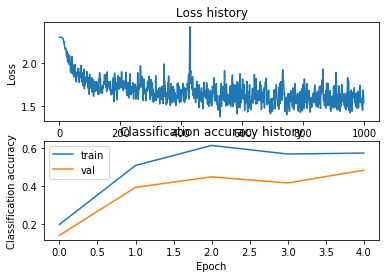

lr = 0.002500 ,reg = 0.500000, hidden layer = 200

iteration 0 / 1000: loss 2.304115
iteration 100 / 1000: loss 1.846756
iteration 200 / 1000: loss 1.791888
iteration 300 / 1000: loss 1.567949
iteration 400 / 1000: loss 1.553275
iteration 500 / 1000: loss 1.620621
iteration 600 / 1000: loss 1.526942
iteration 700 / 1000: loss 1.525633
iteration 800 / 1000: loss 1.550809
iteration 900 / 1000: loss 1.458670
validation accuracy 0.467


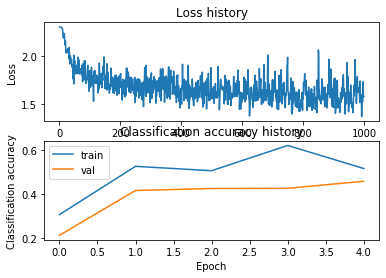

lr = 0.002500 ,reg = 0.500000, hidden layer = 500

iteration 0 / 1000: loss 2.306422
iteration 100 / 1000: loss 1.790384
iteration 200 / 1000: loss 1.581051
iteration 300 / 1000: loss 1.681559
iteration 400 / 1000: loss 1.623154
iteration 500 / 1000: loss 1.641339
iteration 600 / 1000: loss 1.506721
iteration 700 / 1000: loss 1.408905
iteration 800 / 1000: loss 1.551269
iteration 900 / 1000: loss 1.698226
validation accuracy 0.453


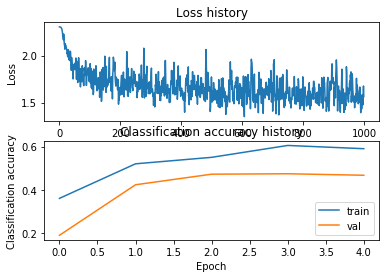

lr = 0.002500 ,reg = 0.750000, hidden layer = 50

iteration 0 / 1000: loss 2.303161
iteration 100 / 1000: loss 1.841551
iteration 200 / 1000: loss 1.689388
iteration 300 / 1000: loss 1.765364
iteration 400 / 1000: loss 1.767348
iteration 500 / 1000: loss 1.604034
iteration 600 / 1000: loss 1.727703
iteration 700 / 1000: loss 1.578261
iteration 800 / 1000: loss 1.568478
iteration 900 / 1000: loss 1.693580
validation accuracy 0.444


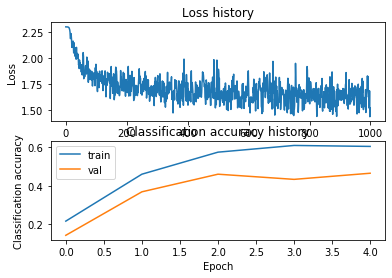

lr = 0.002500 ,reg = 0.750000, hidden layer = 60

iteration 0 / 1000: loss 2.303270
iteration 100 / 1000: loss 1.815358
iteration 200 / 1000: loss 1.602639
iteration 300 / 1000: loss 1.670590
iteration 400 / 1000: loss 1.512042
iteration 500 / 1000: loss 1.754536
iteration 600 / 1000: loss 1.631977
iteration 700 / 1000: loss 1.867259
iteration 800 / 1000: loss 1.697880
iteration 900 / 1000: loss 1.460261
validation accuracy 0.455


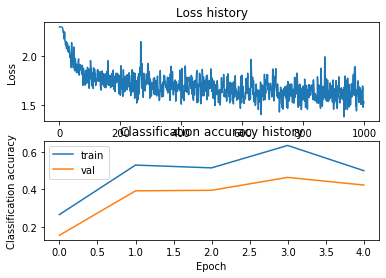

lr = 0.002500 ,reg = 0.750000, hidden layer = 70

iteration 0 / 1000: loss 2.303407
iteration 100 / 1000: loss 1.705127
iteration 200 / 1000: loss 1.668567
iteration 300 / 1000: loss 1.588813
iteration 400 / 1000: loss 1.688615
iteration 500 / 1000: loss 1.500779
iteration 600 / 1000: loss 1.739066
iteration 700 / 1000: loss 1.622036
iteration 800 / 1000: loss 1.541579
iteration 900 / 1000: loss 1.595029
validation accuracy 0.466


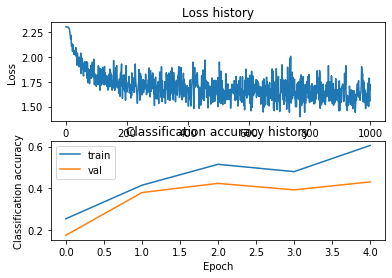

lr = 0.002500 ,reg = 0.750000, hidden layer = 80

iteration 0 / 1000: loss 2.303496
iteration 100 / 1000: loss 1.655255
iteration 200 / 1000: loss 1.745383
iteration 300 / 1000: loss 1.701243
iteration 400 / 1000: loss 1.623109
iteration 500 / 1000: loss 1.638223
iteration 600 / 1000: loss 1.573476
iteration 700 / 1000: loss 1.490715
iteration 800 / 1000: loss 1.664782
iteration 900 / 1000: loss 1.687405
validation accuracy 0.456


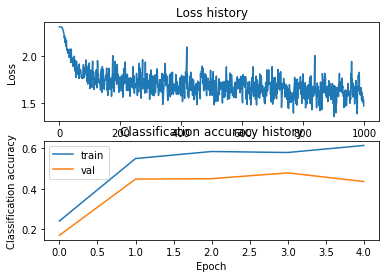

lr = 0.002500 ,reg = 0.750000, hidden layer = 90

iteration 0 / 1000: loss 2.303630
iteration 100 / 1000: loss 1.758963
iteration 200 / 1000: loss 1.718176
iteration 300 / 1000: loss 1.741226
iteration 400 / 1000: loss 1.821354
iteration 500 / 1000: loss 1.682630
iteration 600 / 1000: loss 1.561645
iteration 700 / 1000: loss 1.677354
iteration 800 / 1000: loss 1.650108
iteration 900 / 1000: loss 1.686491
validation accuracy 0.451


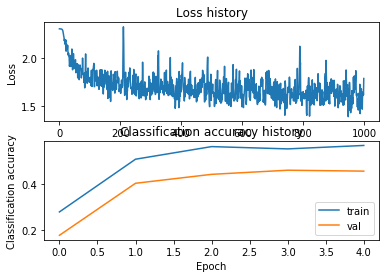

lr = 0.002500 ,reg = 0.750000, hidden layer = 100

iteration 0 / 1000: loss 2.303764
iteration 100 / 1000: loss 1.898148
iteration 200 / 1000: loss 1.889086
iteration 300 / 1000: loss 1.742780
iteration 400 / 1000: loss 1.762288
iteration 500 / 1000: loss 1.687481
iteration 600 / 1000: loss 1.469209
iteration 700 / 1000: loss 1.713699
iteration 800 / 1000: loss 1.734147
iteration 900 / 1000: loss 1.714850
validation accuracy 0.461


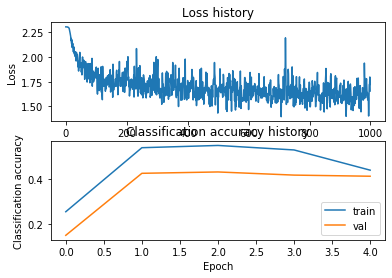

lr = 0.002500 ,reg = 0.750000, hidden layer = 200

iteration 0 / 1000: loss 2.304913
iteration 100 / 1000: loss 1.720574
iteration 200 / 1000: loss 1.656831
iteration 300 / 1000: loss 1.902309
iteration 400 / 1000: loss 1.844990
iteration 500 / 1000: loss 1.701641
iteration 600 / 1000: loss 1.780672
iteration 700 / 1000: loss 1.612654
iteration 800 / 1000: loss 1.488418
iteration 900 / 1000: loss 1.806991
validation accuracy 0.477


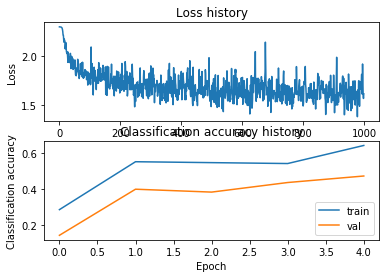

lr = 0.002500 ,reg = 0.750000, hidden layer = 500

iteration 0 / 1000: loss 2.308319
iteration 100 / 1000: loss 1.735791
iteration 200 / 1000: loss 1.654493
iteration 300 / 1000: loss 1.763753
iteration 400 / 1000: loss 1.646002
iteration 500 / 1000: loss 1.638904
iteration 600 / 1000: loss 1.662315
iteration 700 / 1000: loss 1.467879
iteration 800 / 1000: loss 1.607038
iteration 900 / 1000: loss 1.670948
validation accuracy 0.486


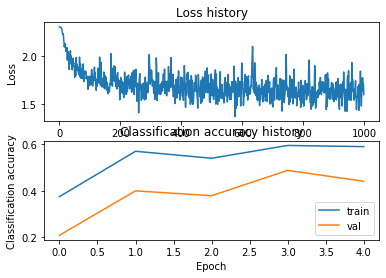

lr = 0.002500 ,reg = 1.000000, hidden layer = 50

iteration 0 / 1000: loss 2.303341
iteration 100 / 1000: loss 1.819510
iteration 200 / 1000: loss 1.956893
iteration 300 / 1000: loss 1.674015
iteration 400 / 1000: loss 1.688699
iteration 500 / 1000: loss 1.565332
iteration 600 / 1000: loss 1.653108
iteration 700 / 1000: loss 1.753019
iteration 800 / 1000: loss 1.712652
iteration 900 / 1000: loss 1.625431
validation accuracy 0.456


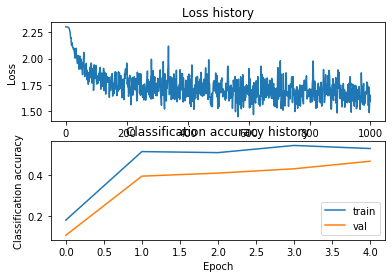

lr = 0.002500 ,reg = 1.000000, hidden layer = 60

iteration 0 / 1000: loss 2.303508
iteration 100 / 1000: loss 1.767193
iteration 200 / 1000: loss 1.752145
iteration 300 / 1000: loss 1.802705
iteration 400 / 1000: loss 1.787943
iteration 500 / 1000: loss 1.702728
iteration 600 / 1000: loss 1.772270
iteration 700 / 1000: loss 1.738696
iteration 800 / 1000: loss 1.581535
iteration 900 / 1000: loss 1.517418
validation accuracy 0.423


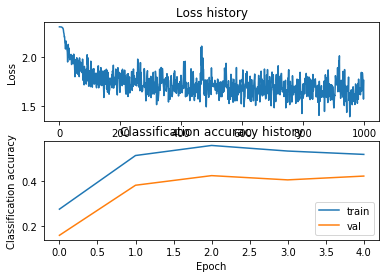

lr = 0.002500 ,reg = 1.000000, hidden layer = 70

iteration 0 / 1000: loss 2.303655
iteration 100 / 1000: loss 1.885964
iteration 200 / 1000: loss 1.670625
iteration 300 / 1000: loss 1.648678
iteration 400 / 1000: loss 1.669041
iteration 500 / 1000: loss 1.713147
iteration 600 / 1000: loss 1.701244
iteration 700 / 1000: loss 1.545867
iteration 800 / 1000: loss 1.576708
iteration 900 / 1000: loss 1.628130
validation accuracy 0.443


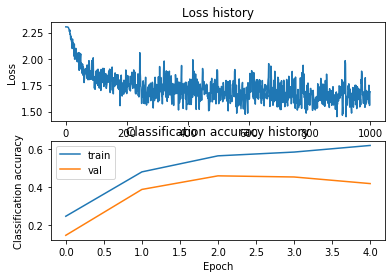

lr = 0.002500 ,reg = 1.000000, hidden layer = 80

iteration 0 / 1000: loss 2.303802
iteration 100 / 1000: loss 1.717702
iteration 200 / 1000: loss 1.627965
iteration 300 / 1000: loss 1.893058
iteration 400 / 1000: loss 1.653906
iteration 500 / 1000: loss 1.780650
iteration 600 / 1000: loss 1.618010
iteration 700 / 1000: loss 1.889496
iteration 800 / 1000: loss 1.744256
iteration 900 / 1000: loss 1.576244
validation accuracy 0.4


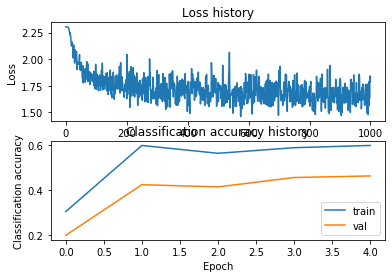

lr = 0.002500 ,reg = 1.000000, hidden layer = 90

iteration 0 / 1000: loss 2.303942
iteration 100 / 1000: loss 1.820703
iteration 200 / 1000: loss 1.802647
iteration 300 / 1000: loss 1.657256
iteration 400 / 1000: loss 1.644129
iteration 500 / 1000: loss 1.494259
iteration 600 / 1000: loss 1.867603
iteration 700 / 1000: loss 1.593458
iteration 800 / 1000: loss 1.614152
iteration 900 / 1000: loss 1.569723
validation accuracy 0.458


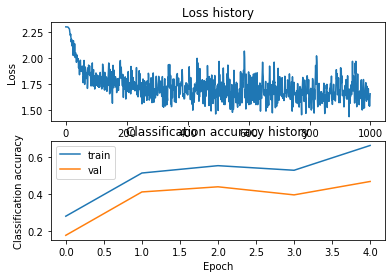

lr = 0.002500 ,reg = 1.000000, hidden layer = 100

iteration 0 / 1000: loss 2.304117
iteration 100 / 1000: loss 1.759645
iteration 200 / 1000: loss 1.752600
iteration 300 / 1000: loss 1.618260
iteration 400 / 1000: loss 1.503984
iteration 500 / 1000: loss 1.749396
iteration 600 / 1000: loss 1.629798
iteration 700 / 1000: loss 1.789583
iteration 800 / 1000: loss 1.580695
iteration 900 / 1000: loss 1.723570
validation accuracy 0.448


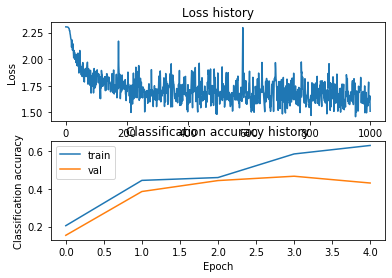

lr = 0.002500 ,reg = 1.000000, hidden layer = 200

iteration 0 / 1000: loss 2.305651
iteration 100 / 1000: loss 1.697106
iteration 200 / 1000: loss 1.716396
iteration 300 / 1000: loss 1.597164
iteration 400 / 1000: loss 1.713128
iteration 500 / 1000: loss 1.508147
iteration 600 / 1000: loss 1.746974
iteration 700 / 1000: loss 1.682906
iteration 800 / 1000: loss 1.594771
iteration 900 / 1000: loss 1.493066
validation accuracy 0.473


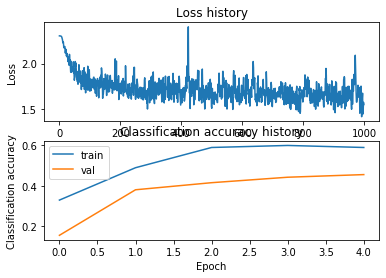

lr = 0.002500 ,reg = 1.000000, hidden layer = 500

iteration 0 / 1000: loss 2.310391
iteration 100 / 1000: loss 1.749297
iteration 200 / 1000: loss 1.669298
iteration 300 / 1000: loss 1.634324
iteration 400 / 1000: loss 1.612385
iteration 500 / 1000: loss 1.581869
iteration 600 / 1000: loss 1.603527
iteration 700 / 1000: loss 1.677290
iteration 800 / 1000: loss 1.608595
iteration 900 / 1000: loss 1.685967
validation accuracy 0.478


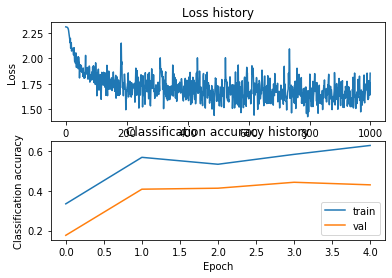

lr = 0.002500 ,reg = 1.250000, hidden layer = 50

iteration 0 / 1000: loss 2.303558
iteration 100 / 1000: loss 1.735405
iteration 200 / 1000: loss 1.653907
iteration 300 / 1000: loss 1.681630
iteration 400 / 1000: loss 1.718335
iteration 500 / 1000: loss 1.636406
iteration 600 / 1000: loss 1.689090
iteration 700 / 1000: loss 1.617152
iteration 800 / 1000: loss 1.616910
iteration 900 / 1000: loss 1.684833
validation accuracy 0.44


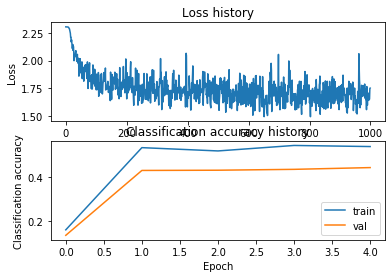

lr = 0.002500 ,reg = 1.250000, hidden layer = 60

iteration 0 / 1000: loss 2.303743
iteration 100 / 1000: loss 1.731940
iteration 200 / 1000: loss 1.727411
iteration 300 / 1000: loss 1.694775
iteration 400 / 1000: loss 1.758070
iteration 500 / 1000: loss 1.834161
iteration 600 / 1000: loss 1.832325
iteration 700 / 1000: loss 1.705849
iteration 800 / 1000: loss 1.913391
iteration 900 / 1000: loss 1.622138
validation accuracy 0.482


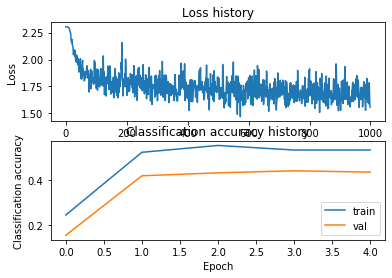

lr = 0.002500 ,reg = 1.250000, hidden layer = 70

iteration 0 / 1000: loss 2.303940
iteration 100 / 1000: loss 1.743161
iteration 200 / 1000: loss 1.696263
iteration 300 / 1000: loss 1.645278
iteration 400 / 1000: loss 1.684616
iteration 500 / 1000: loss 1.913446
iteration 600 / 1000: loss 1.685493
iteration 700 / 1000: loss 1.960678
iteration 800 / 1000: loss 1.691062
iteration 900 / 1000: loss 1.575337
validation accuracy 0.466


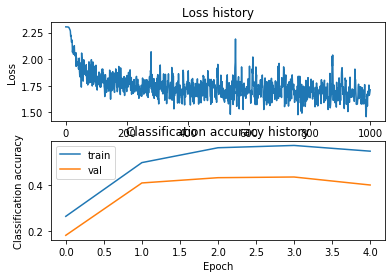

lr = 0.002500 ,reg = 1.250000, hidden layer = 80

iteration 0 / 1000: loss 2.304077
iteration 100 / 1000: loss 1.920093
iteration 200 / 1000: loss 1.746638
iteration 300 / 1000: loss 1.760774
iteration 400 / 1000: loss 1.727181
iteration 500 / 1000: loss 1.691012
iteration 600 / 1000: loss 1.674663
iteration 700 / 1000: loss 1.639308
iteration 800 / 1000: loss 1.624263
iteration 900 / 1000: loss 1.705810
validation accuracy 0.431


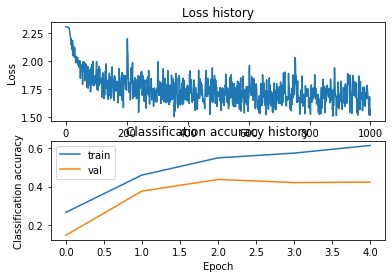

lr = 0.002500 ,reg = 1.250000, hidden layer = 90

iteration 0 / 1000: loss 2.304314
iteration 100 / 1000: loss 1.739745
iteration 200 / 1000: loss 1.782865
iteration 300 / 1000: loss 1.663610
iteration 400 / 1000: loss 1.624840
iteration 500 / 1000: loss 1.651799
iteration 600 / 1000: loss 1.749449
iteration 700 / 1000: loss 1.793336
iteration 800 / 1000: loss 1.737036
iteration 900 / 1000: loss 1.748952
validation accuracy 0.46


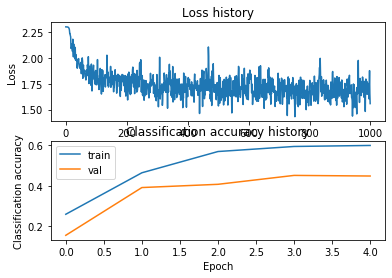

lr = 0.002500 ,reg = 1.250000, hidden layer = 100

iteration 0 / 1000: loss 2.304501
iteration 100 / 1000: loss 1.787123
iteration 200 / 1000: loss 1.727205
iteration 300 / 1000: loss 1.706349
iteration 400 / 1000: loss 1.585049
iteration 500 / 1000: loss 1.671614
iteration 600 / 1000: loss 1.689395
iteration 700 / 1000: loss 1.665866
iteration 800 / 1000: loss 1.758579
iteration 900 / 1000: loss 1.620055
validation accuracy 0.451


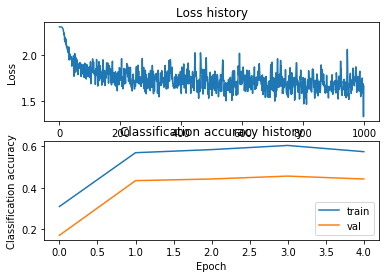

lr = 0.002500 ,reg = 1.250000, hidden layer = 200

iteration 0 / 1000: loss 2.306416
iteration 100 / 1000: loss 1.802101
iteration 200 / 1000: loss 1.778719
iteration 300 / 1000: loss 1.603656
iteration 400 / 1000: loss 1.666469
iteration 500 / 1000: loss 1.598023
iteration 600 / 1000: loss 1.662744
iteration 700 / 1000: loss 1.735404
iteration 800 / 1000: loss 1.698736
iteration 900 / 1000: loss 1.604851
validation accuracy 0.478


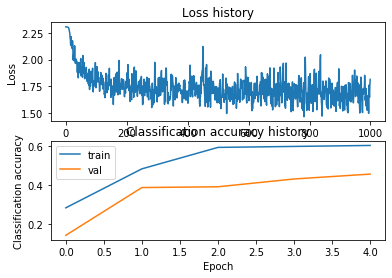

lr = 0.002500 ,reg = 1.250000, hidden layer = 500

iteration 0 / 1000: loss 2.312204
iteration 100 / 1000: loss 1.887013
iteration 200 / 1000: loss 1.741369
iteration 300 / 1000: loss 1.793831
iteration 400 / 1000: loss 1.824128
iteration 500 / 1000: loss 1.689149
iteration 600 / 1000: loss 1.576644
iteration 700 / 1000: loss 1.794058
iteration 800 / 1000: loss 1.621275
iteration 900 / 1000: loss 1.604934
validation accuracy 0.454


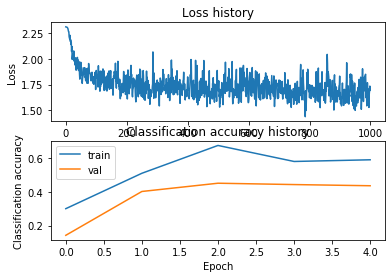

lr = 0.002500 ,reg = 1.500000, hidden layer = 50

iteration 0 / 1000: loss 2.303747
iteration 100 / 1000: loss 1.797616
iteration 200 / 1000: loss 1.734040
iteration 300 / 1000: loss 1.808062
iteration 400 / 1000: loss 1.696499
iteration 500 / 1000: loss 1.791266
iteration 600 / 1000: loss 1.712212
iteration 700 / 1000: loss 1.700721
iteration 800 / 1000: loss 1.844295
iteration 900 / 1000: loss 1.735739
validation accuracy 0.45


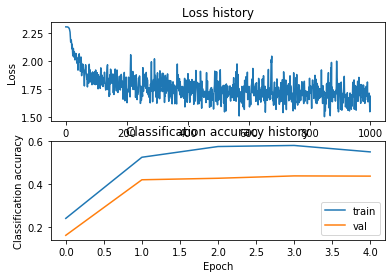

lr = 0.002500 ,reg = 1.500000, hidden layer = 60

iteration 0 / 1000: loss 2.303976
iteration 100 / 1000: loss 1.805689
iteration 200 / 1000: loss 1.822544
iteration 300 / 1000: loss 1.552812
iteration 400 / 1000: loss 1.758119
iteration 500 / 1000: loss 1.747821
iteration 600 / 1000: loss 1.602911
iteration 700 / 1000: loss 1.648886
iteration 800 / 1000: loss 1.742553
iteration 900 / 1000: loss 1.647498
validation accuracy 0.439


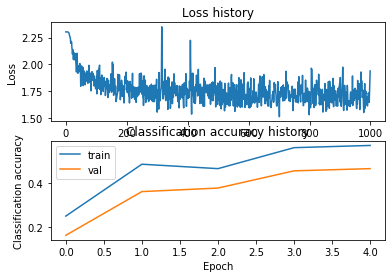

lr = 0.002500 ,reg = 1.500000, hidden layer = 70

iteration 0 / 1000: loss 2.304237
iteration 100 / 1000: loss 1.733506
iteration 200 / 1000: loss 1.844770
iteration 300 / 1000: loss 1.961611
iteration 400 / 1000: loss 1.592656
iteration 500 / 1000: loss 1.642852
iteration 600 / 1000: loss 1.736136
iteration 700 / 1000: loss 1.611838
iteration 800 / 1000: loss 1.644771
iteration 900 / 1000: loss 1.994680
validation accuracy 0.427


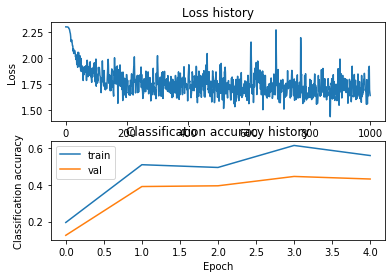

lr = 0.002500 ,reg = 1.500000, hidden layer = 80

iteration 0 / 1000: loss 2.304472
iteration 100 / 1000: loss 1.915627
iteration 200 / 1000: loss 1.885993
iteration 300 / 1000: loss 1.776330
iteration 400 / 1000: loss 1.881691
iteration 500 / 1000: loss 1.612452
iteration 600 / 1000: loss 1.660363
iteration 700 / 1000: loss 1.714449
iteration 800 / 1000: loss 1.627830
iteration 900 / 1000: loss 1.704549
validation accuracy 0.447


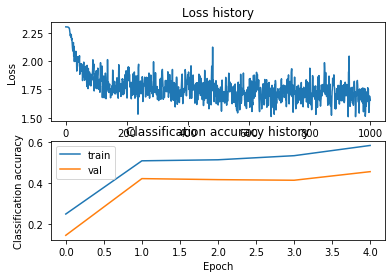

lr = 0.002500 ,reg = 1.500000, hidden layer = 90

iteration 0 / 1000: loss 2.304631
iteration 100 / 1000: loss 1.908099
iteration 200 / 1000: loss 1.984307
iteration 300 / 1000: loss 1.734915
iteration 400 / 1000: loss 1.963599
iteration 500 / 1000: loss 1.633247
iteration 600 / 1000: loss 1.835924
iteration 700 / 1000: loss 1.649694
iteration 800 / 1000: loss 1.771745
iteration 900 / 1000: loss 1.578718
validation accuracy 0.421


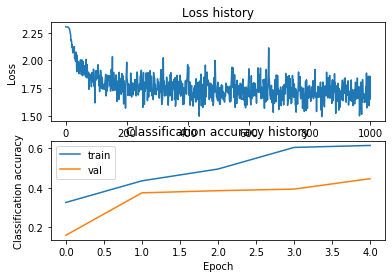

lr = 0.002500 ,reg = 1.500000, hidden layer = 100

iteration 0 / 1000: loss 2.304878
iteration 100 / 1000: loss 1.786880
iteration 200 / 1000: loss 1.752496
iteration 300 / 1000: loss 1.732831
iteration 400 / 1000: loss 1.674631
iteration 500 / 1000: loss 1.687650
iteration 600 / 1000: loss 1.630650
iteration 700 / 1000: loss 1.698159
iteration 800 / 1000: loss 1.748487
iteration 900 / 1000: loss 1.632929
validation accuracy 0.478


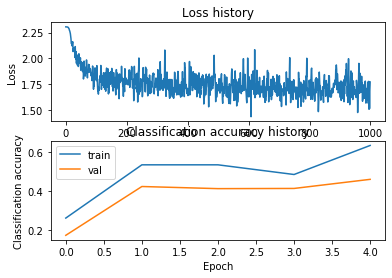

lr = 0.002500 ,reg = 1.500000, hidden layer = 200

iteration 0 / 1000: loss 2.307169
iteration 100 / 1000: loss 2.037336
iteration 200 / 1000: loss 1.659835
iteration 300 / 1000: loss 1.697631
iteration 400 / 1000: loss 1.688074
iteration 500 / 1000: loss 1.675544
iteration 600 / 1000: loss 1.548859
iteration 700 / 1000: loss 1.630529
iteration 800 / 1000: loss 1.634447
iteration 900 / 1000: loss 1.644898
validation accuracy 0.443


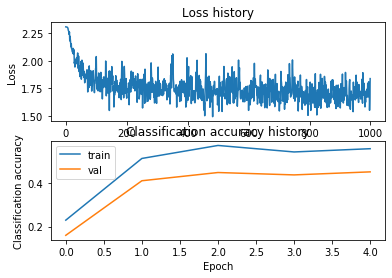

lr = 0.002500 ,reg = 1.500000, hidden layer = 500

iteration 0 / 1000: loss 2.314040
iteration 100 / 1000: loss 1.880177
iteration 200 / 1000: loss 1.829530
iteration 300 / 1000: loss 1.638052
iteration 400 / 1000: loss 1.757616
iteration 500 / 1000: loss 1.650876
iteration 600 / 1000: loss 1.568744
iteration 700 / 1000: loss 1.672329
iteration 800 / 1000: loss 1.654941
iteration 900 / 1000: loss 1.701699
validation accuracy 0.469


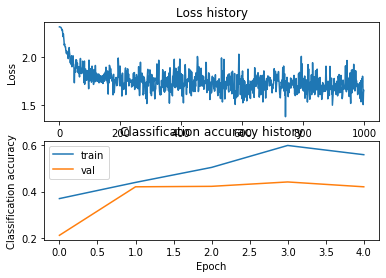

lr = 0.002500 ,reg = 1.750000, hidden layer = 50

iteration 0 / 1000: loss 2.303945
iteration 100 / 1000: loss 1.810524
iteration 200 / 1000: loss 1.752699
iteration 300 / 1000: loss 1.802901
iteration 400 / 1000: loss 1.732621
iteration 500 / 1000: loss 1.780722
iteration 600 / 1000: loss 1.839757
iteration 700 / 1000: loss 1.997815
iteration 800 / 1000: loss 1.760211
iteration 900 / 1000: loss 1.823558
validation accuracy 0.451


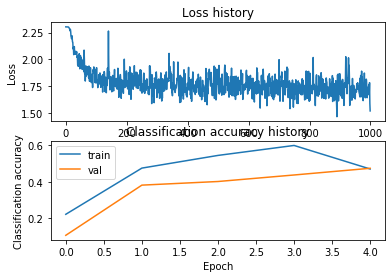

lr = 0.002500 ,reg = 1.750000, hidden layer = 60

iteration 0 / 1000: loss 2.304208
iteration 100 / 1000: loss 1.876044
iteration 200 / 1000: loss 1.827473
iteration 300 / 1000: loss 1.810762
iteration 400 / 1000: loss 1.677671
iteration 500 / 1000: loss 1.731022
iteration 600 / 1000: loss 1.873748
iteration 700 / 1000: loss 1.803702
iteration 800 / 1000: loss 1.825174
iteration 900 / 1000: loss 1.897633
validation accuracy 0.451


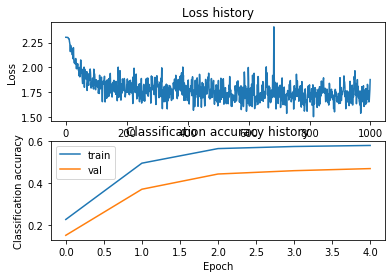

lr = 0.002500 ,reg = 1.750000, hidden layer = 70

iteration 0 / 1000: loss 2.304496
iteration 100 / 1000: loss 1.791084
iteration 200 / 1000: loss 1.748801
iteration 300 / 1000: loss 1.769356
iteration 400 / 1000: loss 1.829272
iteration 500 / 1000: loss 1.813555
iteration 600 / 1000: loss 1.613218
iteration 700 / 1000: loss 1.708768
iteration 800 / 1000: loss 1.757854
iteration 900 / 1000: loss 1.725941
validation accuracy 0.426


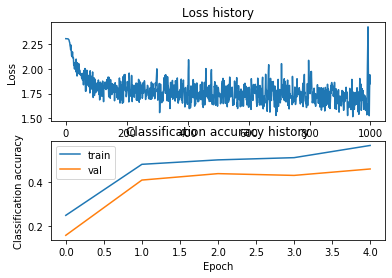

lr = 0.002500 ,reg = 1.750000, hidden layer = 80

iteration 0 / 1000: loss 2.304738
iteration 100 / 1000: loss 1.780461
iteration 200 / 1000: loss 1.873958
iteration 300 / 1000: loss 1.734950
iteration 400 / 1000: loss 1.645856
iteration 500 / 1000: loss 1.709537
iteration 600 / 1000: loss 1.759048
iteration 700 / 1000: loss 1.808101
iteration 800 / 1000: loss 1.592430
iteration 900 / 1000: loss 1.879146
validation accuracy 0.464


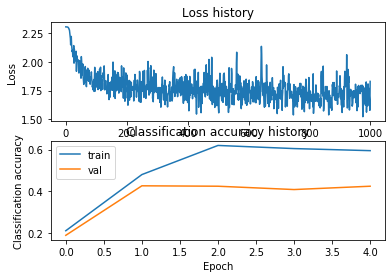

lr = 0.002500 ,reg = 1.750000, hidden layer = 90

iteration 0 / 1000: loss 2.304990
iteration 100 / 1000: loss 1.751462
iteration 200 / 1000: loss 1.733966
iteration 300 / 1000: loss 1.808921
iteration 400 / 1000: loss 1.797129
iteration 500 / 1000: loss 1.757053
iteration 600 / 1000: loss 1.776535
iteration 700 / 1000: loss 1.712865
iteration 800 / 1000: loss 1.720661
iteration 900 / 1000: loss 1.797512
validation accuracy 0.463


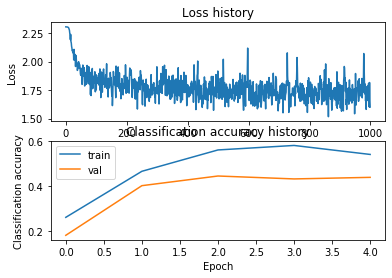

lr = 0.002500 ,reg = 1.750000, hidden layer = 100

iteration 0 / 1000: loss 2.305244
iteration 100 / 1000: loss 1.799148
iteration 200 / 1000: loss 1.673372
iteration 300 / 1000: loss 1.573082
iteration 400 / 1000: loss 1.725991
iteration 500 / 1000: loss 1.746783
iteration 600 / 1000: loss 1.734517
iteration 700 / 1000: loss 1.632927
iteration 800 / 1000: loss 1.783256
iteration 900 / 1000: loss 1.635641
validation accuracy 0.423


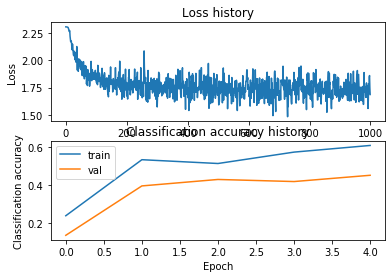

lr = 0.002500 ,reg = 1.750000, hidden layer = 200

iteration 0 / 1000: loss 2.307967
iteration 100 / 1000: loss 1.807417
iteration 200 / 1000: loss 1.697938
iteration 300 / 1000: loss 1.782671
iteration 400 / 1000: loss 1.929302
iteration 500 / 1000: loss 1.735244
iteration 600 / 1000: loss 1.708145
iteration 700 / 1000: loss 1.678124
iteration 800 / 1000: loss 1.661895
iteration 900 / 1000: loss 1.794101
validation accuracy 0.467


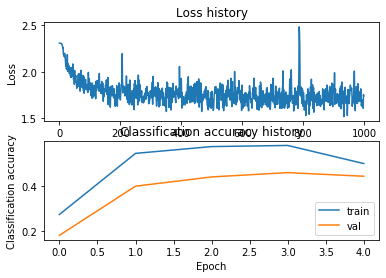

lr = 0.002500 ,reg = 1.750000, hidden layer = 500

iteration 0 / 1000: loss 2.316165
iteration 100 / 1000: loss 1.728432
iteration 200 / 1000: loss 1.737841
iteration 300 / 1000: loss 1.687685
iteration 400 / 1000: loss 1.800464
iteration 500 / 1000: loss 1.624325
iteration 600 / 1000: loss 1.688457
iteration 700 / 1000: loss 1.916666
iteration 800 / 1000: loss 1.772476
iteration 900 / 1000: loss 1.980370
validation accuracy 0.469


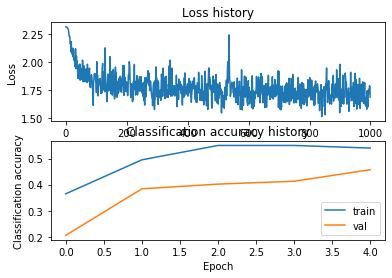

lr = 0.002500 ,reg = 2.000000, hidden layer = 50

iteration 0 / 1000: loss 2.304147
iteration 100 / 1000: loss 1.837071
iteration 200 / 1000: loss 1.898503
iteration 300 / 1000: loss 1.742488
iteration 400 / 1000: loss 1.720817
iteration 500 / 1000: loss 1.640782
iteration 600 / 1000: loss 1.741698
iteration 700 / 1000: loss 1.847755
iteration 800 / 1000: loss 1.688539
iteration 900 / 1000: loss 1.756492
validation accuracy 0.44


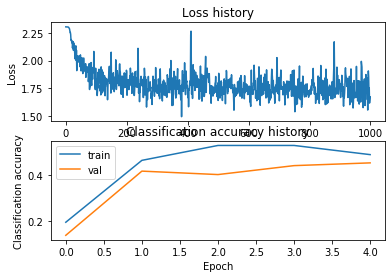

lr = 0.002500 ,reg = 2.000000, hidden layer = 60

iteration 0 / 1000: loss 2.304425
iteration 100 / 1000: loss 1.787376
iteration 200 / 1000: loss 1.662752
iteration 300 / 1000: loss 1.720644
iteration 400 / 1000: loss 1.833536
iteration 500 / 1000: loss 1.598674
iteration 600 / 1000: loss 1.960787
iteration 700 / 1000: loss 1.818082
iteration 800 / 1000: loss 1.915808
iteration 900 / 1000: loss 1.690315
validation accuracy 0.458


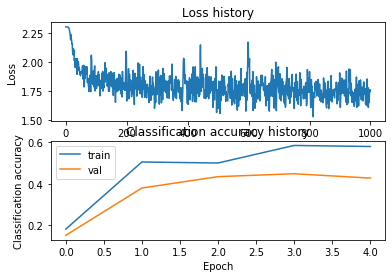

lr = 0.002500 ,reg = 2.000000, hidden layer = 70

iteration 0 / 1000: loss 2.304772
iteration 100 / 1000: loss 1.878072
iteration 200 / 1000: loss 1.690142
iteration 300 / 1000: loss 1.880746
iteration 400 / 1000: loss 1.810232
iteration 500 / 1000: loss 1.740123
iteration 600 / 1000: loss 1.849205
iteration 700 / 1000: loss 1.680457
iteration 800 / 1000: loss 1.793603
iteration 900 / 1000: loss 1.838620
validation accuracy 0.46


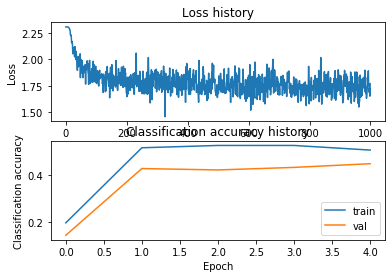

lr = 0.002500 ,reg = 2.000000, hidden layer = 80

iteration 0 / 1000: loss 2.305036
iteration 100 / 1000: loss 1.878397
iteration 200 / 1000: loss 1.717895
iteration 300 / 1000: loss 1.659844
iteration 400 / 1000: loss 1.740732
iteration 500 / 1000: loss 1.763647
iteration 600 / 1000: loss 1.646822
iteration 700 / 1000: loss 1.827598
iteration 800 / 1000: loss 1.803592
iteration 900 / 1000: loss 1.804164
validation accuracy 0.463


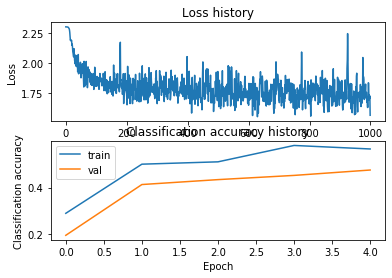

lr = 0.002500 ,reg = 2.000000, hidden layer = 90

iteration 0 / 1000: loss 2.305386
iteration 100 / 1000: loss 1.801276
iteration 200 / 1000: loss 1.815987
iteration 300 / 1000: loss 1.792587
iteration 400 / 1000: loss 1.901413
iteration 500 / 1000: loss 1.637768
iteration 600 / 1000: loss 1.862042
iteration 700 / 1000: loss 1.709043
iteration 800 / 1000: loss 1.828890
iteration 900 / 1000: loss 1.795423
validation accuracy 0.456


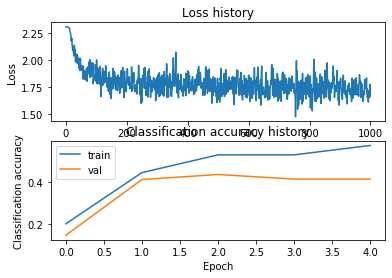

lr = 0.002500 ,reg = 2.000000, hidden layer = 100

iteration 0 / 1000: loss 2.305652
iteration 100 / 1000: loss 1.801399
iteration 200 / 1000: loss 1.877731
iteration 300 / 1000: loss 1.814475
iteration 400 / 1000: loss 1.783439
iteration 500 / 1000: loss 1.790431
iteration 600 / 1000: loss 1.783437
iteration 700 / 1000: loss 1.742280
iteration 800 / 1000: loss 1.688939
iteration 900 / 1000: loss 1.819952
validation accuracy 0.436


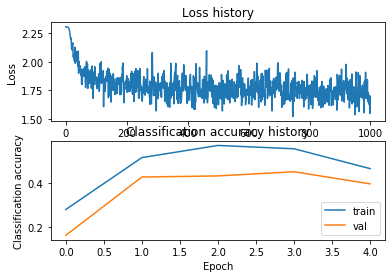

lr = 0.002500 ,reg = 2.000000, hidden layer = 200

iteration 0 / 1000: loss 2.308791
iteration 100 / 1000: loss 1.857311
iteration 200 / 1000: loss 1.727961
iteration 300 / 1000: loss 1.712744
iteration 400 / 1000: loss 1.807720
iteration 500 / 1000: loss 1.870866
iteration 600 / 1000: loss 1.754009
iteration 700 / 1000: loss 1.798007
iteration 800 / 1000: loss 1.700940
iteration 900 / 1000: loss 1.709893
validation accuracy 0.452


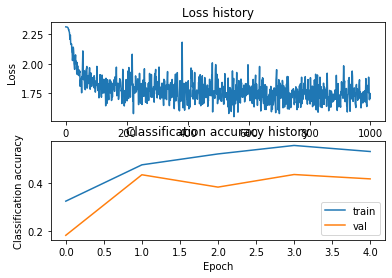

lr = 0.002500 ,reg = 2.000000, hidden layer = 500

iteration 0 / 1000: loss 2.318078
iteration 100 / 1000: loss 1.733099
iteration 200 / 1000: loss 1.759440
iteration 300 / 1000: loss 1.754928
iteration 400 / 1000: loss 1.718242
iteration 500 / 1000: loss 1.859880
iteration 600 / 1000: loss 1.778409
iteration 700 / 1000: loss 1.697445
iteration 800 / 1000: loss 1.798926
iteration 900 / 1000: loss 1.711475
validation accuracy 0.449


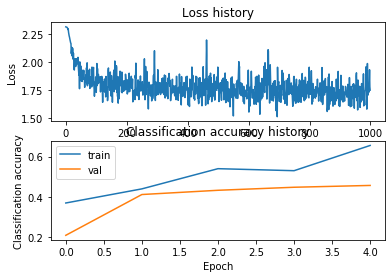

best validation accuracy achieved is: 0.506000


In [25]:
best_net = None # store the best model into this 

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

learning_rates = [1e-3, 2e-3, 2.5e-3]
regularization_strengths = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]
hide_s = [50,60,70,80,90,100,200,500]
best_val = -1
for learning_rate in learning_rates:
   for reg in regularization_strengths:
      for hide in hide_s:
         print('lr = %f ,reg = %f, hidden layer = %d\n' %(learning_rate, reg, hide))
         net = TwoLayerNet(input_size, hide, num_classes)
         stats = net.train(X_train, y_train, X_val, y_val ,num_iters=1000, batch_size=200,
         learning_rate= learning_rate, learning_rate_decay=0.95,
         reg=reg, verbose=True)
         val_acc = (net.predict(X_val) == y_val).mean()
         print('validation accuracy' , val_acc)
         plt.subplot(2, 1, 1)
         plt.plot(stats['loss_history'])
         plt.title('Loss history')
         plt.xlabel('Iteration')
         plt.ylabel('Loss')

         plt.subplot(2, 1, 2)
         plt.plot(stats['train_acc_history'], label='train')
         plt.plot(stats['val_acc_history'], label='val')
         plt.title('Classification accuracy history')
         plt.xlabel('Epoch')
         plt.ylabel('Classification accuracy')
         plt.legend()
         plt.show()
         if val_acc > best_val:
            best_val = val_acc
            best_net = net
print('best validation accuracy achieved is: %f' % best_val)
# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****


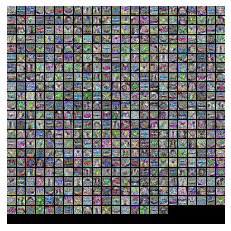

In [26]:
# visualize the weights of the best network
show_net_weights(best_net)

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

In [27]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.501


**Inline Question**

Now that you have trained a Neural Network classifier, you may find that your testing accuracy is much lower than the training accuracy. In what ways can we decrease this gap? Select all that apply.

1. Train on a larger dataset.
2. Add more hidden units.
3. Increase the regularization strength.
4. None of the above.

$\color{blue}{\textit Your Answer:}$

$\color{blue}{\textit Your Explanation:}$

